In [1]:
from torchsummary import summary
from model import AE
from torchvision.datasets import ImageFolder
import torchvision.transforms as transform
import torch
from torch.utils.data import DataLoader 
from torchvision.datasets import CelebA


c:\Conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]           2,432
         LeakyReLU-2           [-1, 32, 64, 64]               0
       BatchNorm2d-3           [-1, 32, 64, 64]              64
            Conv2d-4           [-1, 64, 29, 29]         100,416
         LeakyReLU-5           [-1, 64, 29, 29]               0
       BatchNorm2d-6           [-1, 64, 29, 29]             128
            Conv2d-7          [-1, 128, 12, 12]         401,536
         LeakyReLU-8          [-1, 128, 12, 12]               0
       BatchNorm2d-9          [-1, 128, 12, 12]             256
          Flatten-10                [-1, 18432]               0
           Linear-11                  [-1, 256]       4,718,848
        LeakyReLU-12                  [-1, 256]               0
           Linear-13                [-1, 18432]       4,737,024
           Resize-14          [-1, 128,

In [2]:
data_transform = transform.Compose([ 
    transform.Resize((128, 128)),
    transform.CenterCrop(128),
    transform.ToTensor()
    # transform.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


# train_data = ImageFolder(r"D:\Imagenet\imagenet-object-localization-challenge\ILSVRC\Data\CLS-LOC\train", transform=data_transform)
# val_data = ImageFolder(r"D:\Imagenet\imagenet-object-localization-challenge\ILSVRC\Data\CLS-LOC\val", transform=data_transform)

train_data = CelebA(r"C:\Visual_Studio\data", download=True, transform=data_transform)
val_data = CelebA(r"C:\Visual_Studio\data", download=True, transform=data_transform)


train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=3)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, num_workers=3)

Files already downloaded and verified
Files already downloaded and verified


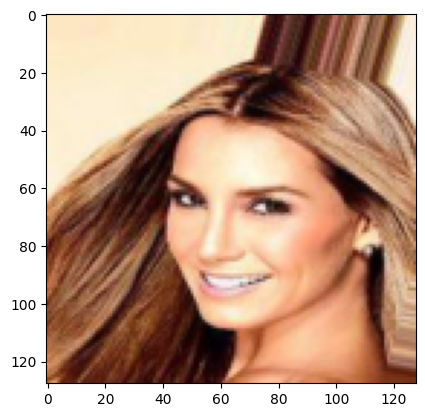

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0][0].permute(1, 2, 0))

In [4]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
print("device = ", device)

model = AE(256).to(device)

critrion = torch.nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)

device =  cuda


In [25]:
from tqdm import tqdm

def train():
    model.train()
    loss_train = []
    count = 0
    for x in tqdm(train_loader):
        x = x[0].to(device)
        print("____________", x)
        optimizer.zero_grad()

        prediction, latent = model(x)
        print("11111111111", prediction)
        loss = critrion(prediction, x)
        loss.backward()
        

        optimizer.step()
        
        if count % 100 == 0:
            loss_train.append(loss.item())
            print("current loss = ", loss_train[-1])
            
        
        count += 1


def val():
    pass

In [27]:
train()

  0%|          | 1/5087 [00:06<9:52:38,  6.99s/it]

____________ tensor([[[[0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0118, 0.0118],
          [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0118, 0.0118],
          [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0118, 0.0118],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.8314, 0.6275, 0.5412],
          [0.0000, 0.0000, 0.0000,  ..., 0.6471, 0.4863, 0.4275],
          [0.0000, 0.0000, 0.0000,  ..., 0.5725, 0.4902, 0.4431]],

         [[0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0118, 0.0118],
          [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0118, 0.0118],
          [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0118, 0.0118],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.6431, 0.4118, 0.2980],
          [0.0000, 0.0000, 0.0000,  ..., 0.4118, 0.2314, 0.1608],
          [0.0000, 0.0000, 0.0000,  ..., 0.3137, 0.2275, 0.1882]],

         [[0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0118, 0.

  0%|          | 2/5087 [00:07<4:11:44,  2.97s/it]

tensor([[[[0.8667, 0.8627, 0.8588,  ..., 0.7333, 0.7294, 0.7412],
          [0.8667, 0.8627, 0.8588,  ..., 0.7333, 0.7294, 0.7412],
          [0.8667, 0.8627, 0.8588,  ..., 0.7333, 0.7294, 0.7412],
          ...,
          [0.0275, 0.0196, 0.0118,  ..., 0.7608, 0.7412, 0.7137],
          [0.0353, 0.0275, 0.0235,  ..., 0.8078, 0.7569, 0.7137],
          [0.0353, 0.0353, 0.0353,  ..., 0.8471, 0.7765, 0.7255]],

         [[0.8784, 0.8745, 0.8706,  ..., 0.7451, 0.7412, 0.7529],
          [0.8784, 0.8745, 0.8706,  ..., 0.7451, 0.7412, 0.7529],
          [0.8784, 0.8745, 0.8706,  ..., 0.7451, 0.7412, 0.7529],
          ...,
          [0.0392, 0.0353, 0.0353,  ..., 0.7216, 0.7137, 0.7020],
          [0.0510, 0.0431, 0.0431,  ..., 0.7569, 0.7216, 0.7059],
          [0.0510, 0.0549, 0.0588,  ..., 0.7882, 0.7412, 0.7176]],

         [[0.9373, 0.9333, 0.9294,  ..., 0.8196, 0.8118, 0.8196],
          [0.9373, 0.9333, 0.9294,  ..., 0.8196, 0.8118, 0.8196],
          [0.9373, 0.9333, 0.9294,  ..., 0

  0%|          | 4/5087 [00:07<1:31:34,  1.08s/it]

tensor([[[[0.2949, 0.3004, 0.2560,  ..., 0.5690, 0.5849, 0.4962],
          [0.2832, 0.2661, 0.2268,  ..., 0.5633, 0.5604, 0.4938],
          [0.2686, 0.2595, 0.2211,  ..., 0.5740, 0.5707, 0.4953],
          ...,
          [0.1983, 0.1623, 0.1506,  ..., 0.2041, 0.2181, 0.4938],
          [0.2097, 0.1639, 0.1623,  ..., 0.2081, 0.2427, 0.4892],
          [0.4845, 0.4869, 0.4859,  ..., 0.4869, 0.4862, 0.4875]],

         [[0.3900, 0.4130, 0.3938,  ..., 0.6350, 0.6119, 0.4755],
          [0.3996, 0.4129, 0.3772,  ..., 0.6320, 0.6186, 0.4538],
          [0.4216, 0.4133, 0.3923,  ..., 0.6311, 0.6254, 0.4579],
          ...,
          [0.1707, 0.1463, 0.1476,  ..., 0.1895, 0.2268, 0.4538],
          [0.1852, 0.1582, 0.1359,  ..., 0.1868, 0.2279, 0.4576],
          [0.4316, 0.4124, 0.4068,  ..., 0.4124, 0.4232, 0.4496]],

         [[0.5340, 0.5744, 0.5834,  ..., 0.6734, 0.6465, 0.4594],
          [0.5391, 0.5972, 0.5943,  ..., 0.6838, 0.6726, 0.4267],
          [0.5617, 0.6136, 0.5961,  ..., 0

  0%|          | 5/5087 [00:07<1:03:20,  1.34it/s]

tensor([[[[0.8745, 0.8784, 0.8784,  ..., 0.8941, 0.8941, 0.8941],
          [0.8745, 0.8784, 0.8784,  ..., 0.8941, 0.8941, 0.8941],
          [0.8745, 0.8784, 0.8784,  ..., 0.8941, 0.8941, 0.8941],
          ...,
          [0.7804, 0.6706, 0.5843,  ..., 0.8627, 0.8549, 0.8588],
          [0.6471, 0.5961, 0.5725,  ..., 0.8902, 0.8941, 0.8941],
          [0.5647, 0.5882, 0.5843,  ..., 0.8941, 0.9059, 0.9059]],

         [[0.8745, 0.8784, 0.8784,  ..., 0.8941, 0.8941, 0.8941],
          [0.8745, 0.8784, 0.8784,  ..., 0.8941, 0.8941, 0.8941],
          [0.8745, 0.8784, 0.8784,  ..., 0.8941, 0.8941, 0.8941],
          ...,
          [0.7843, 0.6745, 0.5882,  ..., 0.8510, 0.8510, 0.8627],
          [0.6471, 0.6000, 0.5725,  ..., 0.8824, 0.8902, 0.8980],
          [0.5647, 0.5922, 0.5843,  ..., 0.8902, 0.9059, 0.9098]],

         [[0.8667, 0.8706, 0.8706,  ..., 0.8863, 0.8863, 0.8863],
          [0.8667, 0.8706, 0.8706,  ..., 0.8863, 0.8863, 0.8863],
          [0.8667, 0.8706, 0.8706,  ..., 0

  0%|          | 7/5087 [00:07<35:41,  2.37it/s]  

tensor([[[[0.6919, 0.7140, 0.7137,  ..., 0.0892, 0.0994, 0.4961],
          [0.7188, 0.7223, 0.7121,  ..., 0.0575, 0.0691, 0.4937],
          [0.7180, 0.7222, 0.7158,  ..., 0.0583, 0.0618, 0.4952],
          ...,
          [0.1055, 0.0747, 0.0604,  ..., 0.0545, 0.0702, 0.4937],
          [0.1232, 0.0887, 0.0742,  ..., 0.0630, 0.1016, 0.4891],
          [0.4844, 0.4868, 0.4858,  ..., 0.4868, 0.4861, 0.4874]],

         [[0.6955, 0.6854, 0.6915,  ..., 0.0723, 0.0985, 0.4754],
          [0.6984, 0.7177, 0.7100,  ..., 0.0597, 0.0629, 0.4537],
          [0.7068, 0.7137, 0.6930,  ..., 0.0585, 0.0733, 0.4577],
          ...,
          [0.0792, 0.0642, 0.0680,  ..., 0.0512, 0.0812, 0.4537],
          [0.1018, 0.0857, 0.0595,  ..., 0.0501, 0.0893, 0.4575],
          [0.4316, 0.4123, 0.4067,  ..., 0.4123, 0.4231, 0.4495]],

         [[0.6797, 0.6833, 0.6828,  ..., 0.0842, 0.1053, 0.4593],
          [0.6865, 0.7021, 0.7033,  ..., 0.0670, 0.0687, 0.4267],
          [0.6994, 0.6955, 0.6951,  ..., 0

  0%|          | 9/5087 [00:08<24:53,  3.40it/s]

____________ tensor([[[[0.0157, 0.0157, 0.0157,  ..., 0.0745, 0.0706, 0.0588],
          [0.0157, 0.0157, 0.0157,  ..., 0.0667, 0.0627, 0.0510],
          [0.0157, 0.0157, 0.0157,  ..., 0.0706, 0.0667, 0.0627],
          ...,
          [0.2784, 0.2863, 0.2941,  ..., 0.0863, 0.1020, 0.1098],
          [0.2627, 0.2745, 0.2902,  ..., 0.1020, 0.1137, 0.1176],
          [0.2039, 0.2157, 0.2314,  ..., 0.1176, 0.1373, 0.1216]],

         [[0.0157, 0.0157, 0.0157,  ..., 0.0745, 0.0745, 0.0667],
          [0.0157, 0.0157, 0.0157,  ..., 0.0667, 0.0667, 0.0588],
          [0.0157, 0.0157, 0.0157,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.2118, 0.2196, 0.2314,  ..., 0.0863, 0.0980, 0.1020],
          [0.1882, 0.2000, 0.2157,  ..., 0.0902, 0.1059, 0.1098],
          [0.1294, 0.1412, 0.1569,  ..., 0.0941, 0.1176, 0.1137]],

         [[0.0078, 0.0078, 0.0078,  ..., 0.0431, 0.0314, 0.0157],
          [0.0078, 0.0078, 0.0078,  ..., 0.0353, 0.0235, 0.0078],
          [0.0078, 0.0078, 0.

  0%|          | 10/5087 [00:08<21:06,  4.01it/s]

tensor([[[[0.8824, 0.8824, 0.8824,  ..., 0.9020, 0.8980, 0.8941],
          [0.8824, 0.8824, 0.8824,  ..., 0.9020, 0.8980, 0.8941],
          [0.8824, 0.8824, 0.8824,  ..., 0.9020, 0.8980, 0.8941],
          ...,
          [0.0510, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0588],
          [0.0627, 0.0549, 0.0471,  ..., 0.0627, 0.0627, 0.0588],
          [0.0588, 0.0549, 0.0588,  ..., 0.0706, 0.0667, 0.0627]],

         [[0.8902, 0.8902, 0.8902,  ..., 0.9098, 0.9098, 0.9098],
          [0.8902, 0.8902, 0.8902,  ..., 0.9098, 0.9098, 0.9098],
          [0.8902, 0.8902, 0.8902,  ..., 0.9098, 0.9098, 0.9098],
          ...,
          [0.0588, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0588],
          [0.0706, 0.0627, 0.0549,  ..., 0.0627, 0.0627, 0.0588],
          [0.0667, 0.0627, 0.0667,  ..., 0.0706, 0.0667, 0.0627]],

         [[0.8863, 0.8863, 0.8863,  ..., 0.9059, 0.9059, 0.9059],
          [0.8863, 0.8863, 0.8863,  ..., 0.9059, 0.9059, 0.9059],
          [0.8863, 0.8863, 0.8863,  ..., 0

  0%|          | 12/5087 [00:08<16:37,  5.09it/s]

tensor([[[[0.7190, 0.7310, 0.7264,  ..., 0.4340, 0.4414, 0.4963],
          [0.7348, 0.7324, 0.7157,  ..., 0.3990, 0.3934, 0.4938],
          [0.7406, 0.7308, 0.7234,  ..., 0.4085, 0.3996, 0.4955],
          ...,
          [0.1873, 0.1402, 0.1389,  ..., 0.8803, 0.8469, 0.4938],
          [0.2162, 0.1592, 0.1626,  ..., 0.8907, 0.8157, 0.4893],
          [0.4846, 0.4870, 0.4861,  ..., 0.4870, 0.4863, 0.4876]],

         [[0.7401, 0.7405, 0.7465,  ..., 0.5425, 0.5163, 0.4755],
          [0.7542, 0.7728, 0.7556,  ..., 0.5155, 0.5070, 0.4538],
          [0.7535, 0.7675, 0.7579,  ..., 0.5186, 0.5204, 0.4579],
          ...,
          [0.2139, 0.1711, 0.1878,  ..., 0.8511, 0.8410, 0.4538],
          [0.2260, 0.1952, 0.1765,  ..., 0.8234, 0.7934, 0.4576],
          [0.4316, 0.4124, 0.4069,  ..., 0.4124, 0.4232, 0.4496]],

         [[0.7535, 0.7665, 0.7652,  ..., 0.5930, 0.5748, 0.4594],
          [0.7723, 0.7994, 0.7925,  ..., 0.6169, 0.6089, 0.4267],
          [0.7857, 0.7953, 0.7849,  ..., 0

  0%|          | 13/5087 [00:08<15:29,  5.46it/s]

tensor([[[[0.9333, 0.9333, 0.9333,  ..., 0.9333, 0.9333, 0.9333],
          [0.9333, 0.9333, 0.9333,  ..., 0.9333, 0.9333, 0.9333],
          [0.9333, 0.9333, 0.9333,  ..., 0.9333, 0.9333, 0.9333],
          ...,
          [0.3412, 0.3412, 0.3412,  ..., 0.9255, 0.8353, 0.7333],
          [0.3412, 0.3412, 0.3412,  ..., 0.9255, 0.8314, 0.7255],
          [0.3412, 0.3412, 0.3412,  ..., 0.9294, 0.8275, 0.7216]],

         [[0.9490, 0.9490, 0.9490,  ..., 0.9490, 0.9490, 0.9490],
          [0.9490, 0.9490, 0.9490,  ..., 0.9490, 0.9490, 0.9490],
          [0.9490, 0.9490, 0.9490,  ..., 0.9490, 0.9490, 0.9490],
          ...,
          [0.3020, 0.3020, 0.3020,  ..., 0.9882, 0.9882, 0.9961],
          [0.3020, 0.3020, 0.3020,  ..., 0.9882, 0.9882, 0.9961],
          [0.3020, 0.3020, 0.3020,  ..., 0.9922, 0.9882, 1.0000]],

         [[0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9882, 0.9843],
          [0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9882, 0.9843],
          [0.9922, 0.9922, 0.9922,  ..., 0

  0%|          | 15/5087 [00:09<13:45,  6.15it/s]

____________ tensor([[[[0.7529, 0.7529, 0.7529,  ..., 0.8235, 0.8235, 0.8235],
          [0.7529, 0.7529, 0.7529,  ..., 0.8235, 0.8235, 0.8235],
          [0.7529, 0.7529, 0.7529,  ..., 0.8235, 0.8235, 0.8235],
          ...,
          [0.7961, 0.7843, 0.5922,  ..., 0.7922, 0.7804, 0.7686],
          [0.7647, 0.7804, 0.5922,  ..., 0.8000, 0.7804, 0.7647],
          [0.7804, 0.7608, 0.5961,  ..., 0.8118, 0.7882, 0.7686]],

         [[0.7490, 0.7490, 0.7490,  ..., 0.8078, 0.8078, 0.8078],
          [0.7490, 0.7490, 0.7490,  ..., 0.8078, 0.8078, 0.8078],
          [0.7490, 0.7490, 0.7490,  ..., 0.8078, 0.8078, 0.8078],
          ...,
          [0.6078, 0.6000, 0.4118,  ..., 0.5725, 0.5608, 0.5569],
          [0.5882, 0.6039, 0.4196,  ..., 0.5765, 0.5686, 0.5647],
          [0.6000, 0.5843, 0.4235,  ..., 0.5882, 0.5804, 0.5765]],

         [[0.7412, 0.7412, 0.7412,  ..., 0.8039, 0.8039, 0.8039],
          [0.7412, 0.7412, 0.7412,  ..., 0.8039, 0.8039, 0.8039],
          [0.7412, 0.7412, 0.

  0%|          | 17/5087 [00:09<12:58,  6.51it/s]

tensor([[[[0.5863, 0.5947, 0.5852,  ..., 0.3184, 0.3223, 0.4961],
          [0.5788, 0.5728, 0.5632,  ..., 0.2899, 0.3042, 0.4936],
          [0.5852, 0.5657, 0.5676,  ..., 0.2917, 0.2871, 0.4952],
          ...,
          [0.8051, 0.8456, 0.8186,  ..., 0.5797, 0.5539, 0.4936],
          [0.7662, 0.7827, 0.8133,  ..., 0.5812, 0.5286, 0.4891],
          [0.4844, 0.4868, 0.4858,  ..., 0.4868, 0.4861, 0.4874]],

         [[0.6178, 0.6095, 0.6143,  ..., 0.3130, 0.3367, 0.4754],
          [0.6194, 0.6292, 0.6158,  ..., 0.2914, 0.2975, 0.4536],
          [0.6080, 0.6199, 0.6155,  ..., 0.3041, 0.3072, 0.4577],
          ...,
          [0.7979, 0.8294, 0.8156,  ..., 0.5456, 0.5449, 0.4536],
          [0.7831, 0.8345, 0.8173,  ..., 0.5308, 0.5157, 0.4575],
          [0.4315, 0.4122, 0.4066,  ..., 0.4122, 0.4230, 0.4495]],

         [[0.6423, 0.6436, 0.6456,  ..., 0.3210, 0.3418, 0.4594],
          [0.6455, 0.6682, 0.6560,  ..., 0.3065, 0.3065, 0.4268],
          [0.6484, 0.6573, 0.6415,  ..., 0

  0%|          | 18/5087 [00:09<13:14,  6.38it/s]

tensor([[[[0.9843, 0.9804, 0.9804,  ..., 0.9961, 0.9961, 1.0000],
          [0.9843, 0.9804, 0.9804,  ..., 0.9961, 0.9961, 1.0000],
          [0.9843, 0.9804, 0.9804,  ..., 0.9961, 0.9961, 1.0000],
          ...,
          [0.8706, 0.8745, 0.8588,  ..., 0.9961, 0.9922, 0.9882],
          [0.8745, 0.8745, 0.8667,  ..., 0.9961, 0.9961, 0.9922],
          [0.8706, 0.8784, 0.8588,  ..., 0.9961, 0.9961, 0.9922]],

         [[0.9216, 0.9176, 0.9176,  ..., 0.9725, 0.9725, 0.9765],
          [0.9216, 0.9176, 0.9176,  ..., 0.9725, 0.9725, 0.9765],
          [0.9216, 0.9176, 0.9176,  ..., 0.9725, 0.9725, 0.9765],
          ...,
          [0.6588, 0.6784, 0.6902,  ..., 0.9569, 0.9529, 0.9490],
          [0.6588, 0.6784, 0.6941,  ..., 0.9569, 0.9569, 0.9529],
          [0.6549, 0.6824, 0.6863,  ..., 0.9569, 0.9569, 0.9529]],

         [[0.9216, 0.9176, 0.9176,  ..., 0.9725, 0.9725, 0.9765],
          [0.9216, 0.9176, 0.9176,  ..., 0.9725, 0.9725, 0.9765],
          [0.9216, 0.9176, 0.9176,  ..., 0

  0%|          | 20/5087 [00:09<12:48,  6.59it/s]

tensor([[[[0.3289, 0.3330, 0.3270,  ..., 0.2469, 0.2534, 0.4962],
          [0.3141, 0.3217, 0.3168,  ..., 0.2183, 0.2316, 0.4938],
          [0.3170, 0.3077, 0.3066,  ..., 0.2332, 0.2292, 0.4954],
          ...,
          [0.4943, 0.5310, 0.5332,  ..., 0.2966, 0.2934, 0.4938],
          [0.4909, 0.5178, 0.5429,  ..., 0.2921, 0.3063, 0.4892],
          [0.4845, 0.4869, 0.4860,  ..., 0.4869, 0.4862, 0.4875]],

         [[0.3132, 0.3245, 0.3148,  ..., 0.2337, 0.2661, 0.4755],
          [0.2835, 0.2916, 0.2952,  ..., 0.2175, 0.2287, 0.4537],
          [0.2953, 0.2995, 0.2985,  ..., 0.2401, 0.2467, 0.4578],
          ...,
          [0.3691, 0.3664, 0.3731,  ..., 0.2607, 0.2871, 0.4537],
          [0.3784, 0.3854, 0.3751,  ..., 0.2615, 0.2884, 0.4576],
          [0.4315, 0.4122, 0.4067,  ..., 0.4122, 0.4230, 0.4495]],

         [[0.2896, 0.2961, 0.2903,  ..., 0.2326, 0.2538, 0.4594],
          [0.2696, 0.2679, 0.2855,  ..., 0.2187, 0.2211, 0.4268],
          [0.2662, 0.2733, 0.2776,  ..., 0

  0%|          | 21/5087 [00:10<12:40,  6.66it/s]

tensor([[[[0.0510, 0.0510, 0.0549,  ..., 0.0275, 0.0235, 0.0196],
          [0.0510, 0.0510, 0.0510,  ..., 0.0275, 0.0235, 0.0196],
          [0.0471, 0.0471, 0.0510,  ..., 0.0275, 0.0275, 0.0235],
          ...,
          [0.2980, 0.2588, 0.2549,  ..., 0.9765, 0.9804, 0.9882],
          [0.3176, 0.3373, 0.2824,  ..., 0.9804, 0.9804, 0.9529],
          [0.4706, 0.5020, 0.3412,  ..., 0.9882, 0.9451, 0.6980]],

         [[0.0431, 0.0431, 0.0471,  ..., 0.0275, 0.0235, 0.0196],
          [0.0431, 0.0431, 0.0431,  ..., 0.0275, 0.0235, 0.0196],
          [0.0392, 0.0392, 0.0431,  ..., 0.0275, 0.0275, 0.0235],
          ...,
          [0.2941, 0.2510, 0.2353,  ..., 0.9961, 0.9922, 0.9961],
          [0.3176, 0.3333, 0.2667,  ..., 0.9961, 0.9922, 0.9608],
          [0.4706, 0.4980, 0.3255,  ..., 1.0000, 0.9490, 0.7059]],

         [[0.1255, 0.1255, 0.1294,  ..., 0.0745, 0.0706, 0.0667],
          [0.1255, 0.1255, 0.1255,  ..., 0.0745, 0.0706, 0.0667],
          [0.1216, 0.1216, 0.1255,  ..., 0

  0%|          | 23/5087 [00:10<12:39,  6.67it/s]

tensor([[[[0.8462, 0.8518, 0.8530,  ..., 0.8428, 0.8616, 0.4962],
          [0.8630, 0.8629, 0.8518,  ..., 0.8784, 0.8750, 0.4937],
          [0.8660, 0.8584, 0.8530,  ..., 0.8991, 0.8906, 0.4954],
          ...,
          [0.2095, 0.1671, 0.1521,  ..., 0.1800, 0.1992, 0.4937],
          [0.2177, 0.1684, 0.1700,  ..., 0.1907, 0.2345, 0.4892],
          [0.4845, 0.4869, 0.4860,  ..., 0.4869, 0.4862, 0.4875]],

         [[0.8592, 0.8592, 0.8745,  ..., 0.8758, 0.8566, 0.4754],
          [0.8759, 0.8924, 0.8869,  ..., 0.9022, 0.8853, 0.4536],
          [0.8746, 0.8820, 0.8807,  ..., 0.8998, 0.8882, 0.4577],
          ...,
          [0.1883, 0.1591, 0.1666,  ..., 0.1858, 0.2377, 0.4536],
          [0.2029, 0.1774, 0.1564,  ..., 0.1783, 0.2252, 0.4575],
          [0.4314, 0.4122, 0.4066,  ..., 0.4122, 0.4229, 0.4494]],

         [[0.8730, 0.8850, 0.8829,  ..., 0.8887, 0.8610, 0.4594],
          [0.8921, 0.9139, 0.9135,  ..., 0.9042, 0.8940, 0.4268],
          [0.8976, 0.9020, 0.9070,  ..., 0

  0%|          | 24/5087 [00:10<12:42,  6.64it/s]

tensor([[[[0.0980, 0.0980, 0.0980,  ..., 0.1137, 0.1137, 0.1020],
          [0.0980, 0.0980, 0.0980,  ..., 0.1059, 0.1098, 0.1020],
          [0.0941, 0.0941, 0.0941,  ..., 0.0980, 0.1059, 0.1020],
          ...,
          [0.7647, 0.7569, 0.7373,  ..., 0.9804, 0.9804, 0.9843],
          [0.7608, 0.7608, 0.7451,  ..., 0.9725, 0.9765, 0.9765],
          [0.7608, 0.7686, 0.7647,  ..., 0.9765, 0.9765, 0.9804]],

         [[0.2431, 0.2431, 0.2431,  ..., 0.2275, 0.2392, 0.2471],
          [0.2431, 0.2431, 0.2431,  ..., 0.2314, 0.2392, 0.2471],
          [0.2392, 0.2392, 0.2392,  ..., 0.2431, 0.2431, 0.2471],
          ...,
          [0.6314, 0.6235, 0.6000,  ..., 0.8314, 0.8314, 0.8353],
          [0.6275, 0.6275, 0.6078,  ..., 0.8235, 0.8275, 0.8275],
          [0.6275, 0.6314, 0.6275,  ..., 0.8275, 0.8275, 0.8314]],

         [[0.7020, 0.7020, 0.7020,  ..., 0.7098, 0.7098, 0.6980],
          [0.7020, 0.7020, 0.7020,  ..., 0.7059, 0.7059, 0.6980],
          [0.6980, 0.6980, 0.6980,  ..., 0

  1%|          | 26/5087 [00:10<12:42,  6.64it/s]

tensor([[[[0.5793, 0.5930, 0.5980,  ..., 0.1873, 0.1893, 0.4961],
          [0.5927, 0.6149, 0.6160,  ..., 0.1505, 0.1728, 0.4937],
          [0.5919, 0.6221, 0.5932,  ..., 0.1656, 0.1577, 0.4952],
          ...,
          [0.7974, 0.8388, 0.8167,  ..., 0.0639, 0.0749, 0.4937],
          [0.7629, 0.7843, 0.8144,  ..., 0.0772, 0.1095, 0.4891],
          [0.4845, 0.4868, 0.4859,  ..., 0.4868, 0.4861, 0.4874]],

         [[0.4617, 0.4416, 0.4272,  ..., 0.1457, 0.1752, 0.4753],
          [0.4345, 0.4287, 0.4245,  ..., 0.1394, 0.1367, 0.4536],
          [0.4650, 0.4546, 0.4207,  ..., 0.1408, 0.1601, 0.4577],
          ...,
          [0.7750, 0.8038, 0.7986,  ..., 0.0737, 0.1079, 0.4536],
          [0.7594, 0.8106, 0.7981,  ..., 0.0736, 0.1090, 0.4574],
          [0.4314, 0.4121, 0.4065,  ..., 0.4121, 0.4229, 0.4494]],

         [[0.3766, 0.3362, 0.3281,  ..., 0.1504, 0.1628, 0.4594],
          [0.3365, 0.2827, 0.2798,  ..., 0.1318, 0.1348, 0.4268],
          [0.3471, 0.3424, 0.2988,  ..., 0

  1%|          | 27/5087 [00:10<12:45,  6.61it/s]

tensor([[[[0.1373, 0.1373, 0.1333,  ..., 0.0941, 0.0941, 0.0941],
          [0.1373, 0.1373, 0.1333,  ..., 0.0941, 0.0941, 0.0941],
          [0.1373, 0.1373, 0.1333,  ..., 0.0941, 0.0941, 0.0941],
          ...,
          [0.1647, 0.1686, 0.1647,  ..., 0.1216, 0.0941, 0.0941],
          [0.1569, 0.1647, 0.1686,  ..., 0.1098, 0.0706, 0.0588],
          [0.1569, 0.1647, 0.1765,  ..., 0.1451, 0.1020, 0.0784]],

         [[0.2549, 0.2549, 0.2510,  ..., 0.1647, 0.1647, 0.1647],
          [0.2549, 0.2549, 0.2510,  ..., 0.1647, 0.1647, 0.1647],
          [0.2549, 0.2549, 0.2510,  ..., 0.1647, 0.1647, 0.1647],
          ...,
          [0.2510, 0.2588, 0.2588,  ..., 0.1216, 0.1059, 0.1176],
          [0.2431, 0.2510, 0.2588,  ..., 0.1098, 0.0784, 0.0745],
          [0.2392, 0.2510, 0.2667,  ..., 0.1373, 0.1098, 0.0941]],

         [[0.2627, 0.2627, 0.2588,  ..., 0.1804, 0.1804, 0.1804],
          [0.2627, 0.2627, 0.2588,  ..., 0.1804, 0.1804, 0.1804],
          [0.2627, 0.2627, 0.2588,  ..., 0

  1%|          | 29/5087 [00:11<13:06,  6.44it/s]

tensor([[[[0.8530, 0.8875, 0.8912,  ..., 0.9356, 0.9328, 0.4962],
          [0.8821, 0.9061, 0.9205,  ..., 0.9714, 0.9696, 0.4937],
          [0.8693, 0.9131, 0.9024,  ..., 0.9831, 0.9797, 0.4953],
          ...,
          [0.4983, 0.5410, 0.5266,  ..., 0.2256, 0.2473, 0.4937],
          [0.4972, 0.5121, 0.5232,  ..., 0.2263, 0.2633, 0.4891],
          [0.4846, 0.4869, 0.4860,  ..., 0.4869, 0.4862, 0.4875]],

         [[0.6838, 0.6869, 0.6937,  ..., 0.8248, 0.8404, 0.4754],
          [0.6513, 0.6790, 0.6526,  ..., 0.9080, 0.8594, 0.4537],
          [0.6680, 0.6773, 0.6902,  ..., 0.8783, 0.8729, 0.4578],
          ...,
          [0.3543, 0.3477, 0.3489,  ..., 0.1802, 0.2151, 0.4537],
          [0.3547, 0.3515, 0.3299,  ..., 0.1776, 0.2220, 0.4575],
          [0.4315, 0.4122, 0.4066,  ..., 0.4122, 0.4230, 0.4495]],

         [[0.5017, 0.4679, 0.4350,  ..., 0.6307, 0.6387, 0.4593],
          [0.4402, 0.3545, 0.3331,  ..., 0.6948, 0.7188, 0.4267],
          [0.4178, 0.4069, 0.3774,  ..., 0

  1%|          | 30/5087 [00:11<13:01,  6.47it/s]

tensor([[[[0.1922, 0.2078, 0.2588,  ..., 0.0000, 0.0000, 0.0000],
          [0.2000, 0.2039, 0.2510,  ..., 0.0000, 0.0000, 0.0000],
          [0.2118, 0.1961, 0.2353,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.1333, 0.1412, 0.1451,  ..., 0.7373, 0.0471, 0.0000],
          [0.1333, 0.1373, 0.1412,  ..., 0.8118, 0.2392, 0.0000],
          [0.1451, 0.1373, 0.1333,  ..., 0.8588, 0.4353, 0.0000]],

         [[0.2549, 0.2706, 0.3216,  ..., 0.0000, 0.0000, 0.0000],
          [0.2627, 0.2627, 0.3098,  ..., 0.0000, 0.0000, 0.0000],
          [0.2706, 0.2549, 0.2941,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.1333, 0.1412, 0.1451,  ..., 0.6863, 0.0235, 0.0000],
          [0.1333, 0.1373, 0.1412,  ..., 0.7569, 0.2078, 0.0000],
          [0.1451, 0.1373, 0.1333,  ..., 0.8000, 0.4039, 0.0000]],

         [[0.4980, 0.5137, 0.5647,  ..., 0.0000, 0.0000, 0.0000],
          [0.5098, 0.5137, 0.5608,  ..., 0.0000, 0.0000, 0.0000],
          [0.5255, 0.5098, 0.5490,  ..., 0

  1%|          | 32/5087 [00:11<12:56,  6.51it/s]

tensor([[[[0.8811, 0.8913, 0.9017,  ..., 0.8732, 0.8880, 0.4961],
          [0.9094, 0.9156, 0.9125,  ..., 0.9128, 0.9111, 0.4937],
          [0.9116, 0.9192, 0.9155,  ..., 0.9283, 0.9245, 0.4953],
          ...,
          [0.7306, 0.7865, 0.7767,  ..., 0.4611, 0.4661, 0.4937],
          [0.6998, 0.7395, 0.7529,  ..., 0.4481, 0.4426, 0.4891],
          [0.4846, 0.4869, 0.4861,  ..., 0.4869, 0.4862, 0.4875]],

         [[0.8707, 0.8686, 0.8892,  ..., 0.8803, 0.8654, 0.4755],
          [0.8754, 0.8928, 0.8948,  ..., 0.9116, 0.8902, 0.4538],
          [0.8930, 0.9016, 0.9061,  ..., 0.9042, 0.8906, 0.4578],
          ...,
          [0.6241, 0.6332, 0.6225,  ..., 0.3509, 0.3678, 0.4538],
          [0.6031, 0.6369, 0.6163,  ..., 0.3560, 0.3696, 0.4576],
          [0.4316, 0.4123, 0.4068,  ..., 0.4123, 0.4231, 0.4495]],

         [[0.8452, 0.8522, 0.8538,  ..., 0.8699, 0.8408, 0.4593],
          [0.8603, 0.8734, 0.8784,  ..., 0.8834, 0.8740, 0.4268],
          [0.8907, 0.8811, 0.8871,  ..., 0

  1%|          | 33/5087 [00:11<12:53,  6.54it/s]

tensor([[[[0.9569, 0.8706, 0.4588,  ..., 0.6039, 0.4431, 0.2549],
          [0.9529, 0.8353, 0.4549,  ..., 0.6039, 0.4196, 0.2627],
          [0.9412, 0.7608, 0.4314,  ..., 0.6000, 0.3765, 0.2706],
          ...,
          [0.7255, 0.6510, 0.5569,  ..., 0.6902, 0.6078, 0.6235],
          [0.7176, 0.6431, 0.5451,  ..., 0.6863, 0.6431, 0.6118],
          [0.7059, 0.6353, 0.5373,  ..., 0.6510, 0.6039, 0.6235]],

         [[0.7725, 0.7137, 0.3451,  ..., 0.4667, 0.3608, 0.2431],
          [0.7765, 0.6863, 0.3490,  ..., 0.4706, 0.3412, 0.2510],
          [0.7922, 0.6353, 0.3490,  ..., 0.4706, 0.2980, 0.2549],
          ...,
          [0.5373, 0.4510, 0.3490,  ..., 0.4980, 0.4196, 0.4431],
          [0.5294, 0.4431, 0.3333,  ..., 0.4941, 0.4588, 0.4353],
          [0.5176, 0.4314, 0.3294,  ..., 0.4588, 0.4196, 0.4510]],

         [[0.5922, 0.5843, 0.3020,  ..., 0.3412, 0.2706, 0.1686],
          [0.6078, 0.5686, 0.3098,  ..., 0.3412, 0.2471, 0.1765],
          [0.6392, 0.5294, 0.3020,  ..., 0

  1%|          | 35/5087 [00:12<12:47,  6.58it/s]

tensor([[[[0.8390, 0.8580, 0.8646,  ..., 0.8333, 0.8539, 0.4961],
          [0.8561, 0.8800, 0.8855,  ..., 0.8811, 0.8745, 0.4937],
          [0.8526, 0.8832, 0.8674,  ..., 0.8990, 0.8880, 0.4953],
          ...,
          [0.0447, 0.0267, 0.0213,  ..., 0.1060, 0.1279, 0.4937],
          [0.0563, 0.0395, 0.0331,  ..., 0.1164, 0.1615, 0.4891],
          [0.4846, 0.4869, 0.4861,  ..., 0.4869, 0.4862, 0.4875]],

         [[0.7322, 0.7178, 0.7224,  ..., 0.8384, 0.8246, 0.4755],
          [0.7039, 0.7122, 0.7003,  ..., 0.8832, 0.8542, 0.4538],
          [0.7240, 0.7116, 0.7324,  ..., 0.8684, 0.8615, 0.4578],
          ...,
          [0.0316, 0.0196, 0.0260,  ..., 0.1171, 0.1530, 0.4538],
          [0.0428, 0.0331, 0.0246,  ..., 0.1098, 0.1553, 0.4575],
          [0.4317, 0.4123, 0.4069,  ..., 0.4123, 0.4232, 0.4496]],

         [[0.5991, 0.5480, 0.5452,  ..., 0.8381, 0.8080, 0.4594],
          [0.5626, 0.4817, 0.4608,  ..., 0.8562, 0.8429, 0.4269],
          [0.5527, 0.5213, 0.5213,  ..., 0

  1%|          | 36/5087 [00:12<12:58,  6.49it/s]

tensor([[[[0.6196, 0.6000, 0.6039,  ..., 0.6118, 0.6157, 0.6196],
          [0.6314, 0.6000, 0.5961,  ..., 0.5922, 0.5725, 0.5608],
          [0.6392, 0.6078, 0.5922,  ..., 0.5490, 0.5725, 0.6039],
          ...,
          [0.2510, 0.2471, 0.2431,  ..., 0.2353, 0.2392, 0.2431],
          [0.2353, 0.2314, 0.2275,  ..., 0.2275, 0.2431, 0.2549],
          [0.2118, 0.2118, 0.2118,  ..., 0.2235, 0.2392, 0.2510]],

         [[0.3882, 0.3725, 0.3843,  ..., 0.5255, 0.5216, 0.5137],
          [0.4000, 0.3725, 0.3765,  ..., 0.4824, 0.4431, 0.4157],
          [0.4039, 0.3804, 0.3725,  ..., 0.4000, 0.4000, 0.4039],
          ...,
          [0.2157, 0.2118, 0.2078,  ..., 0.1961, 0.1961, 0.1922],
          [0.2000, 0.1961, 0.1922,  ..., 0.1882, 0.2000, 0.2039],
          [0.1765, 0.1765, 0.1765,  ..., 0.1843, 0.1922, 0.2000]],

         [[0.2941, 0.2784, 0.2941,  ..., 0.4706, 0.4549, 0.4392],
          [0.3059, 0.2784, 0.2863,  ..., 0.4235, 0.3882, 0.3529],
          [0.3098, 0.2863, 0.2824,  ..., 0

  1%|          | 38/5087 [00:12<13:10,  6.39it/s]

tensor([[[[0.1048, 0.1099, 0.0952,  ..., 0.0366, 0.0421, 0.4962],
          [0.0977, 0.0848, 0.0789,  ..., 0.0190, 0.0216, 0.4938],
          [0.0990, 0.0859, 0.0841,  ..., 0.0211, 0.0220, 0.4954],
          ...,
          [0.6695, 0.7014, 0.6918,  ..., 0.0251, 0.0312, 0.4938],
          [0.6594, 0.6658, 0.6766,  ..., 0.0289, 0.0520, 0.4892],
          [0.4847, 0.4870, 0.4862,  ..., 0.4870, 0.4863, 0.4875]],

         [[0.1035, 0.0979, 0.0920,  ..., 0.0245, 0.0421, 0.4753],
          [0.0858, 0.0723, 0.0784,  ..., 0.0204, 0.0221, 0.4537],
          [0.0906, 0.0811, 0.0909,  ..., 0.0220, 0.0292, 0.4577],
          ...,
          [0.6412, 0.6591, 0.6417,  ..., 0.0219, 0.0393, 0.4537],
          [0.6071, 0.6429, 0.6137,  ..., 0.0224, 0.0468, 0.4574],
          [0.4315, 0.4122, 0.4067,  ..., 0.4122, 0.4230, 0.4495]],

         [[0.0873, 0.0777, 0.0768,  ..., 0.0262, 0.0386, 0.4594],
          [0.0845, 0.0665, 0.0742,  ..., 0.0221, 0.0227, 0.4268],
          [0.0756, 0.0691, 0.0689,  ..., 0

  1%|          | 39/5087 [00:12<13:08,  6.40it/s]

tensor([[[[0.5020, 0.5059, 0.5059,  ..., 0.4863, 0.4902, 0.4824],
          [0.5020, 0.5059, 0.5098,  ..., 0.4863, 0.4902, 0.4824],
          [0.5059, 0.5098, 0.5098,  ..., 0.4863, 0.4902, 0.4824],
          ...,
          [0.0431, 0.0353, 0.0353,  ..., 0.1059, 0.0824, 0.0784],
          [0.0353, 0.0314, 0.0275,  ..., 0.1843, 0.1922, 0.2235],
          [0.0353, 0.0314, 0.0275,  ..., 0.4706, 0.4745, 0.4745]],

         [[0.1608, 0.1647, 0.1647,  ..., 0.1529, 0.1608, 0.1569],
          [0.1608, 0.1647, 0.1647,  ..., 0.1529, 0.1608, 0.1569],
          [0.1608, 0.1647, 0.1647,  ..., 0.1529, 0.1608, 0.1569],
          ...,
          [0.0353, 0.0275, 0.0275,  ..., 0.0431, 0.0471, 0.0824],
          [0.0275, 0.0235, 0.0196,  ..., 0.0980, 0.0863, 0.0941],
          [0.0275, 0.0235, 0.0196,  ..., 0.3647, 0.3137, 0.2510]],

         [[0.1216, 0.1255, 0.1255,  ..., 0.1176, 0.1255, 0.1255],
          [0.1216, 0.1255, 0.1255,  ..., 0.1176, 0.1255, 0.1255],
          [0.1216, 0.1255, 0.1255,  ..., 0

  1%|          | 41/5087 [00:13<13:05,  6.42it/s]

tensor([[[[0.1185, 0.1312, 0.1195,  ..., 0.0232, 0.0280, 0.4962],
          [0.1231, 0.1226, 0.1165,  ..., 0.0113, 0.0131, 0.4938],
          [0.1289, 0.1187, 0.1207,  ..., 0.0117, 0.0123, 0.4954],
          ...,
          [0.6296, 0.6945, 0.7057,  ..., 0.0833, 0.0948, 0.4938],
          [0.6230, 0.6716, 0.7057,  ..., 0.0877, 0.1238, 0.4892],
          [0.4847, 0.4870, 0.4863,  ..., 0.4870, 0.4863, 0.4876]],

         [[0.1075, 0.1010, 0.0989,  ..., 0.0143, 0.0276, 0.4754],
          [0.0909, 0.0839, 0.0885,  ..., 0.0125, 0.0133, 0.4538],
          [0.0941, 0.0899, 0.0974,  ..., 0.0130, 0.0189, 0.4578],
          ...,
          [0.4908, 0.5076, 0.5279,  ..., 0.0670, 0.0962, 0.4538],
          [0.4928, 0.5227, 0.5218,  ..., 0.0684, 0.1083, 0.4575],
          [0.4316, 0.4123, 0.4068,  ..., 0.4123, 0.4231, 0.4495]],

         [[0.0809, 0.0748, 0.0772,  ..., 0.0160, 0.0256, 0.4595],
          [0.0782, 0.0633, 0.0739,  ..., 0.0137, 0.0141, 0.4269],
          [0.0694, 0.0674, 0.0707,  ..., 0

  1%|          | 42/5087 [00:13<13:04,  6.43it/s]

tensor([[[[0.0902, 0.0902, 0.0863,  ..., 0.0000, 0.0000, 0.0000],
          [0.0902, 0.0902, 0.0863,  ..., 0.0000, 0.0000, 0.0000],
          [0.0902, 0.0902, 0.0863,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2980, 0.2314, 0.1373,  ..., 0.2275, 0.2275, 0.2235],
          [0.1765, 0.1020, 0.0863,  ..., 0.2510, 0.2510, 0.2471],
          [0.1137, 0.1176, 0.1176,  ..., 0.2706, 0.2706, 0.2706]],

         [[0.2510, 0.2588, 0.2627,  ..., 0.4980, 0.4980, 0.4980],
          [0.2510, 0.2588, 0.2627,  ..., 0.4980, 0.4980, 0.4980],
          [0.2510, 0.2588, 0.2627,  ..., 0.4980, 0.4980, 0.4980],
          ...,
          [0.4235, 0.3608, 0.2627,  ..., 0.2157, 0.2157, 0.2118],
          [0.1804, 0.1137, 0.1059,  ..., 0.2392, 0.2392, 0.2353],
          [0.0902, 0.0863, 0.0745,  ..., 0.2588, 0.2588, 0.2588]],

         [[0.6039, 0.6118, 0.6157,  ..., 0.9569, 0.9569, 0.9569],
          [0.6039, 0.6118, 0.6157,  ..., 0.9569, 0.9569, 0.9569],
          [0.6039, 0.6118, 0.6157,  ..., 0

  1%|          | 44/5087 [00:13<13:30,  6.22it/s]

tensor([[[[0.0520, 0.0570, 0.0394,  ..., 0.0173, 0.0219, 0.4961],
          [0.0488, 0.0392, 0.0232,  ..., 0.0078, 0.0093, 0.4937],
          [0.0400, 0.0411, 0.0284,  ..., 0.0085, 0.0086, 0.4953],
          ...,
          [0.3687, 0.3797, 0.3697,  ..., 0.1277, 0.1430, 0.4937],
          [0.3773, 0.3683, 0.3790,  ..., 0.1340, 0.1682, 0.4892],
          [0.4847, 0.4869, 0.4861,  ..., 0.4869, 0.4863, 0.4875]],

         [[0.0544, 0.0411, 0.0358,  ..., 0.0105, 0.0217, 0.4754],
          [0.0419, 0.0300, 0.0293,  ..., 0.0082, 0.0088, 0.4537],
          [0.0404, 0.0341, 0.0419,  ..., 0.0091, 0.0138, 0.4577],
          ...,
          [0.2678, 0.2534, 0.2528,  ..., 0.1053, 0.1399, 0.4537],
          [0.2749, 0.2655, 0.2499,  ..., 0.1074, 0.1525, 0.4575],
          [0.4316, 0.4122, 0.4068,  ..., 0.4122, 0.4231, 0.4495]],

         [[0.0395, 0.0311, 0.0271,  ..., 0.0137, 0.0225, 0.4595],
          [0.0421, 0.0260, 0.0235,  ..., 0.0101, 0.0112, 0.4269],
          [0.0309, 0.0241, 0.0194,  ..., 0

  1%|          | 45/5087 [00:13<13:18,  6.32it/s]

____________ tensor([[[[0.8667, 0.8627, 0.8588,  ..., 0.8824, 0.8824, 0.8824],
          [0.8667, 0.8627, 0.8588,  ..., 0.8824, 0.8824, 0.8824],
          [0.8667, 0.8627, 0.8588,  ..., 0.8824, 0.8824, 0.8824],
          ...,
          [1.0000, 0.9961, 0.9882,  ..., 0.9647, 0.9647, 0.9686],
          [0.9961, 0.9922, 0.9922,  ..., 0.9529, 0.9529, 0.9529],
          [0.9961, 0.9922, 0.9843,  ..., 0.9373, 0.9412, 0.9412]],

         [[0.8706, 0.8667, 0.8627,  ..., 0.8863, 0.8863, 0.8863],
          [0.8706, 0.8667, 0.8627,  ..., 0.8863, 0.8863, 0.8863],
          [0.8706, 0.8667, 0.8627,  ..., 0.8863, 0.8863, 0.8863],
          ...,
          [0.9882, 0.9804, 0.9765,  ..., 0.9569, 0.9569, 0.9608],
          [0.9843, 0.9765, 0.9843,  ..., 0.9451, 0.9451, 0.9451],
          [0.9882, 0.9882, 0.9804,  ..., 0.9294, 0.9333, 0.9333]],

         [[0.8784, 0.8745, 0.8706,  ..., 0.8941, 0.8941, 0.8941],
          [0.8784, 0.8745, 0.8706,  ..., 0.8941, 0.8941, 0.8941],
          [0.8784, 0.8745, 0.

  1%|          | 46/5087 [00:13<13:23,  6.27it/s]

tensor([[[[0.8863, 0.8863, 0.8863,  ..., 0.7373, 0.7373, 0.7373],
          [0.8863, 0.8863, 0.8863,  ..., 0.7373, 0.7373, 0.7373],
          [0.8863, 0.8863, 0.8863,  ..., 0.7373, 0.7373, 0.7373],
          ...,
          [0.0353, 0.0353, 0.0353,  ..., 0.0588, 0.0588, 0.0549],
          [0.0392, 0.0392, 0.0392,  ..., 0.0627, 0.0588, 0.0549],
          [0.0314, 0.0314, 0.0353,  ..., 0.0588, 0.0588, 0.0588]],

         [[0.9176, 0.9176, 0.9176,  ..., 0.8196, 0.8196, 0.8196],
          [0.9176, 0.9176, 0.9176,  ..., 0.8196, 0.8196, 0.8196],
          [0.9176, 0.9176, 0.9176,  ..., 0.8196, 0.8196, 0.8196],
          ...,
          [0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0392],
          [0.0314, 0.0314, 0.0314,  ..., 0.0471, 0.0431, 0.0392],
          [0.0235, 0.0235, 0.0275,  ..., 0.0353, 0.0353, 0.0353]],

         [[0.9294, 0.9294, 0.9294,  ..., 0.9333, 0.9333, 0.9333],
          [0.9294, 0.9294, 0.9294,  ..., 0.9333, 0.9333, 0.9333],
          [0.9294, 0.9294, 0.9294,  ..., 0

  1%|          | 48/5087 [00:14<13:30,  6.22it/s]

tensor([[[[0.0155, 0.0159, 0.0089,  ..., 0.8876, 0.9039, 0.4963],
          [0.0122, 0.0063, 0.0038,  ..., 0.9220, 0.9170, 0.4938],
          [0.0067, 0.0051, 0.0024,  ..., 0.9407, 0.9339, 0.4955],
          ...,
          [0.0202, 0.0110, 0.0080,  ..., 0.8352, 0.7896, 0.4938],
          [0.0274, 0.0191, 0.0145,  ..., 0.8421, 0.7602, 0.4893],
          [0.4848, 0.4870, 0.4863,  ..., 0.4870, 0.4864, 0.4876]],

         [[0.0186, 0.0118, 0.0098,  ..., 0.9095, 0.8922, 0.4755],
          [0.0110, 0.0049, 0.0051,  ..., 0.9369, 0.9193, 0.4538],
          [0.0093, 0.0060, 0.0063,  ..., 0.9352, 0.9250, 0.4579],
          ...,
          [0.0127, 0.0068, 0.0103,  ..., 0.8222, 0.8106, 0.4538],
          [0.0193, 0.0147, 0.0101,  ..., 0.7881, 0.7610, 0.4575],
          [0.4316, 0.4122, 0.4068,  ..., 0.4122, 0.4231, 0.4495]],

         [[0.0124, 0.0083, 0.0071,  ..., 0.9174, 0.8919, 0.4594],
          [0.0130, 0.0063, 0.0063,  ..., 0.9331, 0.9204, 0.4269],
          [0.0059, 0.0042, 0.0033,  ..., 0

  1%|          | 49/5087 [00:14<13:18,  6.31it/s]

tensor([[[[0.8275, 0.8275, 0.8314,  ..., 0.8196, 0.8314, 0.8510],
          [0.8275, 0.8275, 0.8275,  ..., 0.8235, 0.8431, 0.8667],
          [0.8275, 0.8275, 0.8275,  ..., 0.8235, 0.8549, 0.8706],
          ...,
          [0.7569, 0.7490, 0.6627,  ..., 0.8353, 0.8353, 0.8353],
          [0.7725, 0.7569, 0.6431,  ..., 0.8549, 0.8471, 0.8510],
          [0.7765, 0.7490, 0.6588,  ..., 0.8627, 0.8549, 0.8549]],

         [[0.7255, 0.7255, 0.7294,  ..., 0.7451, 0.7569, 0.7765],
          [0.7255, 0.7255, 0.7255,  ..., 0.7490, 0.7686, 0.7922],
          [0.7255, 0.7255, 0.7255,  ..., 0.7490, 0.7804, 0.7961],
          ...,
          [0.7020, 0.6941, 0.6078,  ..., 0.7647, 0.7647, 0.7686],
          [0.7176, 0.7020, 0.5882,  ..., 0.7804, 0.7765, 0.7843],
          [0.7216, 0.6941, 0.6039,  ..., 0.7882, 0.7804, 0.7882]],

         [[0.6667, 0.6667, 0.6706,  ..., 0.6863, 0.6980, 0.7176],
          [0.6667, 0.6667, 0.6667,  ..., 0.6902, 0.7098, 0.7333],
          [0.6667, 0.6667, 0.6667,  ..., 0

  1%|          | 51/5087 [00:14<13:44,  6.11it/s]

tensor([[[[0.4643, 0.4779, 0.4660,  ..., 0.6804, 0.6909, 0.4962],
          [0.4654, 0.4751, 0.4708,  ..., 0.7233, 0.7283, 0.4937],
          [0.4651, 0.4695, 0.4632,  ..., 0.7403, 0.7365, 0.4954],
          ...,
          [0.5796, 0.6017, 0.5915,  ..., 0.7200, 0.6918, 0.4937],
          [0.5642, 0.5682, 0.5736,  ..., 0.7231, 0.6543, 0.4892],
          [0.4847, 0.4869, 0.4862,  ..., 0.4869, 0.4863, 0.4875]],

         [[0.4205, 0.4210, 0.4068,  ..., 0.6467, 0.6396, 0.4755],
          [0.3931, 0.3970, 0.3852,  ..., 0.6647, 0.6436, 0.4538],
          [0.3967, 0.4064, 0.3832,  ..., 0.6570, 0.6437, 0.4578],
          ...,
          [0.5280, 0.5231, 0.5139,  ..., 0.6721, 0.6638, 0.4538],
          [0.5064, 0.5114, 0.5013,  ..., 0.6489, 0.6234, 0.4575],
          [0.4316, 0.4122, 0.4068,  ..., 0.4122, 0.4231, 0.4495]],

         [[0.3779, 0.3789, 0.3638,  ..., 0.5909, 0.5814, 0.4594],
          [0.3467, 0.3398, 0.3336,  ..., 0.5815, 0.5873, 0.4269],
          [0.3505, 0.3533, 0.3327,  ..., 0

  1%|          | 52/5087 [00:14<14:13,  5.90it/s]

____________ tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0118, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0118, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0118, 0.0000],
          ...,
          [0.3451, 0.3412, 0.3490,  ..., 0.7020, 0.6706, 0.6471],
          [0.3451, 0.3686, 0.3922,  ..., 0.7059, 0.6431, 0.6314],
          [0.4000, 0.3647, 0.4235,  ..., 0.6431, 0.6627, 0.6627]],

         [[0.0275, 0.0235, 0.0196,  ..., 0.0353, 0.0353, 0.0353],
          [0.0275, 0.0235, 0.0196,  ..., 0.0392, 0.0353, 0.0353],
          [0.0275, 0.0235, 0.0196,  ..., 0.0392, 0.0392, 0.0353],
          ...,
          [0.3529, 0.3451, 0.3529,  ..., 0.7020, 0.6706, 0.6471],
          [0.3569, 0.3804, 0.4039,  ..., 0.7059, 0.6431, 0.6314],
          [0.4157, 0.3804, 0.4353,  ..., 0.6431, 0.6627, 0.6627]],

         [[0.3098, 0.3059, 0.3020,  ..., 0.3098, 0.2980, 0.2824],
          [0.3098, 0.3059, 0.3020,  ..., 0.3059, 0.2980, 0.2824],
          [0.3098, 0.3059, 0.

  1%|          | 53/5087 [00:15<14:54,  5.63it/s]

tensor([[[[0.9137, 0.9137, 0.9176,  ..., 0.9804, 0.9804, 0.9804],
          [0.9137, 0.9137, 0.9176,  ..., 0.9804, 0.9804, 0.9804],
          [0.9137, 0.9137, 0.9176,  ..., 0.9804, 0.9804, 0.9804],
          ...,
          [0.4941, 0.4980, 0.4980,  ..., 0.8588, 0.8549, 0.8471],
          [0.4824, 0.4863, 0.4745,  ..., 0.8549, 0.8549, 0.8510],
          [0.4627, 0.4667, 0.4588,  ..., 0.8510, 0.8471, 0.8431]],

         [[0.9176, 0.9176, 0.9216,  ..., 0.9804, 0.9804, 0.9804],
          [0.9176, 0.9176, 0.9216,  ..., 0.9804, 0.9804, 0.9804],
          [0.9176, 0.9176, 0.9216,  ..., 0.9804, 0.9804, 0.9804],
          ...,
          [0.5412, 0.5451, 0.5451,  ..., 0.8627, 0.8627, 0.8627],
          [0.5294, 0.5333, 0.5216,  ..., 0.8588, 0.8627, 0.8667],
          [0.5098, 0.5137, 0.5059,  ..., 0.8549, 0.8549, 0.8588]],

         [[0.9373, 0.9373, 0.9412,  ..., 0.9804, 0.9804, 0.9804],
          [0.9373, 0.9373, 0.9412,  ..., 0.9804, 0.9804, 0.9804],
          [0.9373, 0.9373, 0.9412,  ..., 0

  1%|          | 54/5087 [00:15<15:48,  5.31it/s]

tensor([[[[0.1020, 0.0706, 0.0510,  ..., 0.9608, 0.9608, 0.9569],
          [0.0980, 0.0745, 0.0549,  ..., 0.9608, 0.9569, 0.9569],
          [0.0941, 0.0784, 0.0588,  ..., 0.9569, 0.9529, 0.9529],
          ...,
          [0.8941, 0.8941, 0.8745,  ..., 0.8510, 0.8588, 0.8706],
          [0.8902, 0.9059, 0.9176,  ..., 0.8627, 0.8588, 0.8588],
          [0.9020, 0.8941, 0.8941,  ..., 0.8627, 0.8549, 0.8549]],

         [[0.1255, 0.0941, 0.0706,  ..., 0.9608, 0.9608, 0.9608],
          [0.1216, 0.0980, 0.0706,  ..., 0.9608, 0.9569, 0.9608],
          [0.1176, 0.1020, 0.0745,  ..., 0.9569, 0.9569, 0.9569],
          ...,
          [0.8353, 0.8392, 0.8196,  ..., 0.8745, 0.8824, 0.8941],
          [0.8118, 0.8392, 0.8471,  ..., 0.8863, 0.8824, 0.8824],
          [0.8157, 0.8118, 0.8196,  ..., 0.8863, 0.8784, 0.8784]],

         [[0.1725, 0.1412, 0.1176,  ..., 0.9529, 0.9451, 0.9373],
          [0.1686, 0.1451, 0.1176,  ..., 0.9529, 0.9451, 0.9373],
          [0.1647, 0.1490, 0.1216,  ..., 0

  1%|          | 55/5087 [00:15<15:46,  5.31it/s]

tensor([[[[0.6855, 0.6915, 0.6824,  ..., 0.6565, 0.6772, 0.4963],
          [0.6925, 0.6875, 0.6713,  ..., 0.6642, 0.6626, 0.4938],
          [0.6900, 0.6790, 0.6778,  ..., 0.6732, 0.6751, 0.4955],
          ...,
          [0.3245, 0.2957, 0.2839,  ..., 0.2745, 0.2760, 0.4938],
          [0.3356, 0.2972, 0.2979,  ..., 0.2739, 0.2918, 0.4893],
          [0.4847, 0.4870, 0.4862,  ..., 0.4870, 0.4863, 0.4876]],

         [[0.7211, 0.7202, 0.7317,  ..., 0.7253, 0.6954, 0.4754],
          [0.7321, 0.7476, 0.7385,  ..., 0.7328, 0.7211, 0.4538],
          [0.7235, 0.7346, 0.7403,  ..., 0.7326, 0.7266, 0.4578],
          ...,
          [0.3063, 0.2816, 0.2693,  ..., 0.2307, 0.2599, 0.4538],
          [0.3039, 0.2840, 0.2648,  ..., 0.2370, 0.2655, 0.4575],
          [0.4316, 0.4123, 0.4068,  ..., 0.4123, 0.4231, 0.4495]],

         [[0.7471, 0.7590, 0.7576,  ..., 0.7559, 0.7281, 0.4594],
          [0.7626, 0.7955, 0.7882,  ..., 0.7712, 0.7612, 0.4269],
          [0.7685, 0.7802, 0.7726,  ..., 0

  1%|          | 57/5087 [00:15<16:54,  4.96it/s]

____________ tensor([[[[0.4353, 0.4353, 0.4392,  ..., 0.8902, 0.8902, 0.8902],
          [0.4353, 0.4353, 0.4392,  ..., 0.8902, 0.8902, 0.8902],
          [0.4353, 0.4353, 0.4392,  ..., 0.8902, 0.8902, 0.8902],
          ...,
          [0.9176, 0.9216, 0.9216,  ..., 0.9451, 0.9216, 0.8745],
          [0.9216, 0.9255, 0.9333,  ..., 0.9451, 0.9216, 0.8784],
          [0.9137, 0.9216, 0.9333,  ..., 0.9451, 0.9294, 0.8863]],

         [[0.3176, 0.3216, 0.3255,  ..., 0.9176, 0.9176, 0.9176],
          [0.3176, 0.3216, 0.3255,  ..., 0.9176, 0.9176, 0.9176],
          [0.3176, 0.3216, 0.3255,  ..., 0.9176, 0.9176, 0.9176],
          ...,
          [0.9608, 0.9529, 0.9373,  ..., 0.9882, 0.9608, 0.8980],
          [0.9608, 0.9608, 0.9490,  ..., 0.9882, 0.9608, 0.9020],
          [0.9569, 0.9569, 0.9490,  ..., 0.9882, 0.9686, 0.9098]],

         [[0.5294, 0.5333, 0.5333,  ..., 0.9490, 0.9490, 0.9490],
          [0.5294, 0.5333, 0.5333,  ..., 0.9490, 0.9490, 0.9490],
          [0.5294, 0.5333, 0.

  1%|          | 58/5087 [00:16<16:39,  5.03it/s]

____________ tensor([[[[0.2824, 0.2902, 0.2902,  ..., 0.3608, 0.3647, 0.3725],
          [0.2784, 0.2863, 0.2902,  ..., 0.3569, 0.3569, 0.3647],
          [0.2863, 0.2941, 0.2941,  ..., 0.3529, 0.3647, 0.3725],
          ...,
          [0.8196, 0.8118, 0.8039,  ..., 0.5922, 0.5804, 0.5725],
          [0.8118, 0.8039, 0.8000,  ..., 0.5922, 0.5804, 0.5725],
          [0.8078, 0.8078, 0.8039,  ..., 0.5882, 0.5843, 0.5765]],

         [[0.2863, 0.2941, 0.2941,  ..., 0.4000, 0.4000, 0.4000],
          [0.2824, 0.2902, 0.2941,  ..., 0.3961, 0.3922, 0.3922],
          [0.2902, 0.2980, 0.2980,  ..., 0.3882, 0.3961, 0.4000],
          ...,
          [0.7961, 0.7882, 0.7804,  ..., 0.6471, 0.6392, 0.6353],
          [0.7882, 0.7804, 0.7765,  ..., 0.6471, 0.6392, 0.6353],
          [0.7843, 0.7843, 0.7804,  ..., 0.6431, 0.6431, 0.6392]],

         [[0.3569, 0.3647, 0.3647,  ..., 0.4980, 0.5059, 0.5137],
          [0.3529, 0.3608, 0.3647,  ..., 0.4941, 0.4980, 0.5059],
          [0.3608, 0.3686, 0.

  1%|          | 59/5087 [00:16<16:29,  5.08it/s]

tensor([[[[0.7333, 0.7451, 0.6902,  ..., 0.9333, 0.9294, 0.9255],
          [0.7255, 0.7333, 0.7216,  ..., 0.9216, 0.9255, 0.9294],
          [0.7216, 0.7216, 0.7451,  ..., 0.9294, 0.9333, 0.9373],
          ...,
          [0.7804, 0.8118, 0.8157,  ..., 0.9765, 0.9765, 0.9725],
          [0.8157, 0.8392, 0.8471,  ..., 0.9765, 0.9765, 0.9765],
          [0.8471, 0.8627, 0.8667,  ..., 0.9843, 0.9765, 0.9725]],

         [[0.5490, 0.5608, 0.5059,  ..., 0.9412, 0.9373, 0.9333],
          [0.5451, 0.5529, 0.5373,  ..., 0.9294, 0.9333, 0.9373],
          [0.5412, 0.5412, 0.5647,  ..., 0.9373, 0.9412, 0.9451],
          ...,
          [0.5294, 0.5608, 0.5647,  ..., 0.9804, 0.9804, 0.9765],
          [0.5647, 0.5882, 0.5961,  ..., 0.9804, 0.9804, 0.9804],
          [0.5843, 0.6039, 0.6118,  ..., 0.9882, 0.9804, 0.9765]],

         [[0.3255, 0.3373, 0.2902,  ..., 0.8902, 0.8863, 0.8824],
          [0.3137, 0.3255, 0.3216,  ..., 0.8784, 0.8824, 0.8863],
          [0.3098, 0.3137, 0.3412,  ..., 0

  1%|          | 60/5087 [00:16<16:14,  5.16it/s]

tensor([[[[0.6434, 0.6458, 0.6423,  ..., 0.7860, 0.8108, 0.4963],
          [0.6450, 0.6367, 0.6294,  ..., 0.8212, 0.8183, 0.4938],
          [0.6434, 0.6320, 0.6289,  ..., 0.8389, 0.8362, 0.4955],
          ...,
          [0.0651, 0.0415, 0.0338,  ..., 0.0458, 0.0581, 0.4938],
          [0.0727, 0.0506, 0.0423,  ..., 0.0552, 0.0873, 0.4893],
          [0.4847, 0.4870, 0.4862,  ..., 0.4870, 0.4863, 0.4876]],

         [[0.6487, 0.6366, 0.6402,  ..., 0.8268, 0.8028, 0.4753],
          [0.6440, 0.6487, 0.6428,  ..., 0.8481, 0.8337, 0.4537],
          [0.6284, 0.6343, 0.6358,  ..., 0.8513, 0.8358, 0.4576],
          ...,
          [0.0398, 0.0274, 0.0336,  ..., 0.0459, 0.0735, 0.4537],
          [0.0508, 0.0407, 0.0296,  ..., 0.0446, 0.0784, 0.4574],
          [0.4315, 0.4121, 0.4067,  ..., 0.4121, 0.4230, 0.4494]],

         [[0.6481, 0.6418, 0.6390,  ..., 0.8401, 0.8105, 0.4594],
          [0.6443, 0.6584, 0.6490,  ..., 0.8558, 0.8454, 0.4269],
          [0.6479, 0.6477, 0.6402,  ..., 0

  1%|          | 61/5087 [00:16<16:19,  5.13it/s]

____________ tensor([[[[0.2549, 0.2549, 0.2549,  ..., 0.1608, 0.1529, 0.1412],
          [0.2667, 0.2667, 0.2667,  ..., 0.1608, 0.1529, 0.1412],
          [0.3020, 0.2980, 0.2941,  ..., 0.1608, 0.1529, 0.1451],
          ...,
          [0.7725, 0.7490, 0.7843,  ..., 0.6706, 0.4510, 0.3608],
          [0.7765, 0.8039, 0.7961,  ..., 0.6275, 0.3843, 0.4392],
          [0.8039, 0.8078, 0.7961,  ..., 0.5608, 0.4353, 0.4980]],

         [[0.3373, 0.3373, 0.3373,  ..., 0.1333, 0.1294, 0.1373],
          [0.3294, 0.3294, 0.3294,  ..., 0.1333, 0.1294, 0.1373],
          [0.3412, 0.3373, 0.3333,  ..., 0.1373, 0.1294, 0.1412],
          ...,
          [0.7804, 0.7569, 0.7922,  ..., 0.6118, 0.4196, 0.3569],
          [0.7843, 0.8118, 0.8039,  ..., 0.5765, 0.3569, 0.4314],
          [0.8118, 0.8157, 0.8039,  ..., 0.5176, 0.4078, 0.4902]],

         [[0.4235, 0.4235, 0.4235,  ..., 0.1765, 0.1647, 0.1608],
          [0.4275, 0.4275, 0.4275,  ..., 0.1765, 0.1647, 0.1608],
          [0.4510, 0.4471, 0.

  1%|          | 62/5087 [00:16<16:48,  4.98it/s]

____________ tensor([[[[0.8431, 0.8471, 0.8471,  ..., 0.7922, 0.7961, 0.8000],
          [0.8431, 0.8471, 0.8471,  ..., 0.7922, 0.7922, 0.7961],
          [0.8431, 0.8471, 0.8471,  ..., 0.7922, 0.7922, 0.7922],
          ...,
          [0.7804, 0.7725, 0.7294,  ..., 0.4863, 0.4235, 0.4275],
          [0.7647, 0.7529, 0.7216,  ..., 0.5451, 0.4824, 0.4392],
          [0.7608, 0.7451, 0.7176,  ..., 0.5098, 0.4980, 0.4667]],

         [[0.8471, 0.8510, 0.8510,  ..., 0.7882, 0.7922, 0.7961],
          [0.8471, 0.8510, 0.8510,  ..., 0.7882, 0.7882, 0.7922],
          [0.8471, 0.8510, 0.8510,  ..., 0.7882, 0.7882, 0.7882],
          ...,
          [0.7882, 0.7765, 0.7255,  ..., 0.3020, 0.2431, 0.2510],
          [0.7686, 0.7569, 0.7137,  ..., 0.3608, 0.2980, 0.2549],
          [0.7569, 0.7412, 0.7020,  ..., 0.3294, 0.3176, 0.2863]],

         [[0.8667, 0.8706, 0.8706,  ..., 0.8118, 0.8157, 0.8196],
          [0.8667, 0.8706, 0.8706,  ..., 0.8118, 0.8118, 0.8157],
          [0.8667, 0.8706, 0.

  1%|▏         | 64/5087 [00:17<16:42,  5.01it/s]

____________ tensor([[[[0.8627, 0.8627, 0.8627,  ..., 0.8471, 0.8471, 0.8431],
          [0.8627, 0.8627, 0.8627,  ..., 0.8471, 0.8471, 0.8431],
          [0.8627, 0.8627, 0.8627,  ..., 0.8471, 0.8471, 0.8471],
          ...,
          [0.6118, 0.6510, 0.6902,  ..., 0.2745, 0.6157, 0.6549],
          [0.6078, 0.6745, 0.7294,  ..., 0.4000, 0.5882, 0.6471],
          [0.6000, 0.6824, 0.7451,  ..., 0.5137, 0.5412, 0.5725]],

         [[0.8510, 0.8510, 0.8510,  ..., 0.8353, 0.8353, 0.8314],
          [0.8510, 0.8510, 0.8510,  ..., 0.8353, 0.8353, 0.8314],
          [0.8510, 0.8510, 0.8510,  ..., 0.8353, 0.8353, 0.8353],
          ...,
          [0.4000, 0.4235, 0.4431,  ..., 0.2157, 0.5686, 0.6118],
          [0.3922, 0.4471, 0.4863,  ..., 0.3176, 0.4980, 0.5569],
          [0.3804, 0.4510, 0.4980,  ..., 0.4078, 0.4118, 0.4314]],

         [[0.8314, 0.8314, 0.8314,  ..., 0.8157, 0.8157, 0.8118],
          [0.8314, 0.8314, 0.8314,  ..., 0.8157, 0.8157, 0.8118],
          [0.8314, 0.8314, 0.

  1%|▏         | 65/5087 [00:17<16:03,  5.21it/s]

tensor([[[[0.0824, 0.0863, 0.0902,  ..., 0.1176, 0.1176, 0.1216],
          [0.0824, 0.0863, 0.0902,  ..., 0.1176, 0.1176, 0.1216],
          [0.0824, 0.0863, 0.0902,  ..., 0.1176, 0.1176, 0.1216],
          ...,
          [0.7255, 0.7059, 0.6706,  ..., 0.3490, 0.3529, 0.3569],
          [0.7294, 0.7098, 0.6745,  ..., 0.3490, 0.3529, 0.3569],
          [0.7294, 0.7137, 0.6824,  ..., 0.3412, 0.3451, 0.3490]],

         [[0.0784, 0.0824, 0.0863,  ..., 0.1098, 0.1098, 0.1176],
          [0.0784, 0.0824, 0.0863,  ..., 0.1098, 0.1098, 0.1176],
          [0.0784, 0.0824, 0.0863,  ..., 0.1098, 0.1098, 0.1176],
          ...,
          [0.6196, 0.5961, 0.5608,  ..., 0.2196, 0.2235, 0.2235],
          [0.6235, 0.6000, 0.5647,  ..., 0.2157, 0.2196, 0.2235],
          [0.6235, 0.6039, 0.5725,  ..., 0.2078, 0.2118, 0.2157]],

         [[0.0706, 0.0745, 0.0784,  ..., 0.1137, 0.1059, 0.0980],
          [0.0706, 0.0745, 0.0784,  ..., 0.1137, 0.1059, 0.0980],
          [0.0706, 0.0745, 0.0784,  ..., 0

  1%|▏         | 66/5087 [00:17<15:23,  5.43it/s]

tensor([[[[0.8560, 0.8717, 0.8775,  ..., 0.8742, 0.8901, 0.4963],
          [0.8885, 0.8951, 0.8916,  ..., 0.9167, 0.9169, 0.4938],
          [0.8844, 0.8979, 0.8889,  ..., 0.9299, 0.9305, 0.4955],
          ...,
          [0.8621, 0.9123, 0.9084,  ..., 0.8305, 0.8287, 0.4938],
          [0.8290, 0.8741, 0.8962,  ..., 0.8358, 0.7775, 0.4893],
          [0.4846, 0.4869, 0.4861,  ..., 0.4869, 0.4862, 0.4875]],

         [[0.8360, 0.8359, 0.8474,  ..., 0.8666, 0.8492, 0.4754],
          [0.8370, 0.8618, 0.8604,  ..., 0.9002, 0.8770, 0.4537],
          [0.8527, 0.8635, 0.8616,  ..., 0.8905, 0.8755, 0.4577],
          ...,
          [0.7905, 0.8215, 0.8264,  ..., 0.6836, 0.6827, 0.4537],
          [0.7773, 0.8343, 0.8233,  ..., 0.6799, 0.6502, 0.4574],
          [0.4315, 0.4121, 0.4066,  ..., 0.4121, 0.4230, 0.4494]],

         [[0.7961, 0.8049, 0.7960,  ..., 0.8350, 0.8155, 0.4595],
          [0.8107, 0.8257, 0.8269,  ..., 0.8492, 0.8472, 0.4270],
          [0.8384, 0.8229, 0.8277,  ..., 0

  1%|▏         | 68/5087 [00:18<15:22,  5.44it/s]

____________ tensor([[[[0.0863, 0.0863, 0.0824,  ..., 0.0941, 0.0980, 0.1098],
          [0.0824, 0.0824, 0.0824,  ..., 0.0941, 0.0980, 0.1098],
          [0.0902, 0.0863, 0.0863,  ..., 0.0941, 0.0980, 0.1098],
          ...,
          [0.6392, 0.6431, 0.6588,  ..., 0.1843, 0.1882, 0.1922],
          [0.6353, 0.6431, 0.6549,  ..., 0.1765, 0.1686, 0.1686],
          [0.6235, 0.6353, 0.6549,  ..., 0.1843, 0.1843, 0.1765]],

         [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0157, 0.0118, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.4706, 0.4824, 0.5059,  ..., 0.2196, 0.2196, 0.2196],
          [0.4627, 0.4745, 0.4980,  ..., 0.2118, 0.2039, 0.2039],
          [0.4431, 0.4627, 0.4902,  ..., 0.2196, 0.2196, 0.2118]],

         [[0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.

  1%|▏         | 69/5087 [00:18<15:15,  5.48it/s]

tensor([[[[0.7765, 0.7765, 0.7804,  ..., 0.7765, 0.7765, 0.7804],
          [0.7765, 0.7765, 0.7804,  ..., 0.7765, 0.7765, 0.7804],
          [0.7765, 0.7765, 0.7804,  ..., 0.7765, 0.7765, 0.7804],
          ...,
          [0.0706, 0.0667, 0.0627,  ..., 0.1608, 0.3608, 0.6824],
          [0.0706, 0.0667, 0.0627,  ..., 0.1490, 0.2549, 0.5608],
          [0.0706, 0.0667, 0.0627,  ..., 0.1569, 0.2157, 0.4784]],

         [[0.6902, 0.6902, 0.6941,  ..., 0.6941, 0.6941, 0.6980],
          [0.6902, 0.6902, 0.6941,  ..., 0.6941, 0.6941, 0.6980],
          [0.6902, 0.6902, 0.6941,  ..., 0.6941, 0.6941, 0.6980],
          ...,
          [0.0706, 0.0667, 0.0627,  ..., 0.1255, 0.3137, 0.6196],
          [0.0706, 0.0667, 0.0627,  ..., 0.1137, 0.2118, 0.5020],
          [0.0706, 0.0667, 0.0627,  ..., 0.1176, 0.1686, 0.4196]],

         [[0.4980, 0.4980, 0.5020,  ..., 0.5255, 0.5255, 0.5294],
          [0.4980, 0.4980, 0.5020,  ..., 0.5255, 0.5255, 0.5294],
          [0.4980, 0.4980, 0.5020,  ..., 0

  1%|▏         | 70/5087 [00:18<15:19,  5.46it/s]

tensor([[[[0.9109, 0.9215, 0.9288,  ..., 0.8469, 0.8686, 0.4963],
          [0.9387, 0.9401, 0.9386,  ..., 0.8898, 0.8878, 0.4938],
          [0.9368, 0.9383, 0.9411,  ..., 0.9000, 0.9023, 0.4955],
          ...,
          [0.2495, 0.2118, 0.1904,  ..., 0.0969, 0.1151, 0.4938],
          [0.2466, 0.2072, 0.1942,  ..., 0.1066, 0.1468, 0.4893],
          [0.4847, 0.4869, 0.4861,  ..., 0.4869, 0.4862, 0.4876]],

         [[0.9136, 0.9160, 0.9299,  ..., 0.8596, 0.8397, 0.4753],
          [0.9243, 0.9404, 0.9422,  ..., 0.8889, 0.8716, 0.4537],
          [0.9339, 0.9394, 0.9429,  ..., 0.8839, 0.8652, 0.4577],
          ...,
          [0.1899, 0.1568, 0.1610,  ..., 0.0848, 0.1227, 0.4537],
          [0.1906, 0.1658, 0.1455,  ..., 0.0860, 0.1282, 0.4574],
          [0.4314, 0.4120, 0.4065,  ..., 0.4120, 0.4229, 0.4494]],

         [[0.9084, 0.9153, 0.9218,  ..., 0.8435, 0.8224, 0.4592],
          [0.9237, 0.9383, 0.9416,  ..., 0.8590, 0.8509, 0.4267],
          [0.9408, 0.9336, 0.9394,  ..., 0

  1%|▏         | 72/5087 [00:18<15:29,  5.40it/s]

____________ tensor([[[[0.3725, 0.3765, 0.3765,  ..., 0.6000, 0.6118, 0.6078],
          [0.3765, 0.3765, 0.3765,  ..., 0.6039, 0.6078, 0.6078],
          [0.3922, 0.3882, 0.3843,  ..., 0.6078, 0.6078, 0.6078],
          ...,
          [0.2863, 0.0392, 0.0353,  ..., 0.7843, 0.7490, 0.6510],
          [0.0784, 0.0353, 0.0157,  ..., 0.7137, 0.7686, 0.7490],
          [0.0549, 0.0314, 0.0196,  ..., 0.6706, 0.7059, 0.7451]],

         [[0.3333, 0.3373, 0.3373,  ..., 0.5647, 0.5765, 0.5725],
          [0.3373, 0.3373, 0.3373,  ..., 0.5686, 0.5725, 0.5725],
          [0.3529, 0.3490, 0.3451,  ..., 0.5725, 0.5725, 0.5725],
          ...,
          [0.2863, 0.0392, 0.0353,  ..., 0.8235, 0.7882, 0.6863],
          [0.0784, 0.0353, 0.0157,  ..., 0.7608, 0.8196, 0.8078],
          [0.0549, 0.0314, 0.0196,  ..., 0.7294, 0.7725, 0.8196]],

         [[0.2863, 0.2902, 0.2902,  ..., 0.5059, 0.5137, 0.5059],
          [0.2902, 0.2902, 0.2902,  ..., 0.5098, 0.5098, 0.5059],
          [0.3059, 0.3020, 0.

  1%|▏         | 73/5087 [00:19<15:29,  5.39it/s]

tensor([[[[0.2353, 0.2353, 0.2353,  ..., 0.2471, 0.2510, 0.2471],
          [0.2353, 0.2353, 0.2353,  ..., 0.2471, 0.2510, 0.2471],
          [0.2353, 0.2353, 0.2353,  ..., 0.2471, 0.2510, 0.2471],
          ...,
          [0.2863, 0.2667, 0.2510,  ..., 0.7216, 0.7608, 0.7608],
          [0.2784, 0.2588, 0.2392,  ..., 0.7216, 0.7373, 0.7529],
          [0.2667, 0.2549, 0.2431,  ..., 0.6706, 0.7020, 0.7176]],

         [[0.4314, 0.4314, 0.4314,  ..., 0.4431, 0.4471, 0.4431],
          [0.4314, 0.4314, 0.4314,  ..., 0.4431, 0.4471, 0.4431],
          [0.4314, 0.4314, 0.4314,  ..., 0.4431, 0.4471, 0.4431],
          ...,
          [0.6627, 0.6471, 0.6353,  ..., 0.5765, 0.6118, 0.6000],
          [0.6549, 0.6392, 0.6235,  ..., 0.6039, 0.6078, 0.6078],
          [0.6431, 0.6314, 0.6275,  ..., 0.5647, 0.5765, 0.5765]],

         [[0.4745, 0.4745, 0.4745,  ..., 0.4863, 0.4902, 0.4863],
          [0.4745, 0.4745, 0.4745,  ..., 0.4863, 0.4902, 0.4863],
          [0.4745, 0.4745, 0.4745,  ..., 0

  1%|▏         | 75/5087 [00:19<15:18,  5.45it/s]

tensor([[[[0.3802, 0.3936, 0.3948,  ..., 0.4734, 0.4996, 0.4963],
          [0.3929, 0.4209, 0.4126,  ..., 0.5086, 0.5003, 0.4938],
          [0.4143, 0.4099, 0.4151,  ..., 0.5049, 0.5110, 0.4955],
          ...,
          [0.4867, 0.5206, 0.4823,  ..., 0.1957, 0.2229, 0.4938],
          [0.4648, 0.4802, 0.4634,  ..., 0.2016, 0.2482, 0.4893],
          [0.4846, 0.4868, 0.4860,  ..., 0.4868, 0.4861, 0.4875]],

         [[0.3137, 0.3178, 0.3116,  ..., 0.3756, 0.3974, 0.4753],
          [0.2888, 0.3061, 0.2902,  ..., 0.3691, 0.3767, 0.4537],
          [0.2992, 0.3168, 0.2929,  ..., 0.3717, 0.3797, 0.4577],
          ...,
          [0.3394, 0.3209, 0.2933,  ..., 0.1568, 0.1961, 0.4537],
          [0.3273, 0.3176, 0.2725,  ..., 0.1538, 0.2015, 0.4574],
          [0.4314, 0.4120, 0.4065,  ..., 0.4120, 0.4229, 0.4494]],

         [[0.2487, 0.2540, 0.2390,  ..., 0.2917, 0.2994, 0.4593],
          [0.2278, 0.2203, 0.2133,  ..., 0.2763, 0.2833, 0.4266],
          [0.2224, 0.2328, 0.2215,  ..., 0

  1%|▏         | 76/5087 [00:19<15:12,  5.49it/s]

____________ tensor([[[[0.8392, 0.8431, 0.8510,  ..., 0.8392, 0.8392, 0.8392],
          [0.8392, 0.8431, 0.8510,  ..., 0.8392, 0.8392, 0.8392],
          [0.8392, 0.8431, 0.8510,  ..., 0.8392, 0.8392, 0.8392],
          ...,
          [0.2784, 0.2784, 0.2980,  ..., 0.0745, 0.0941, 0.1020],
          [0.2745, 0.2745, 0.2902,  ..., 0.0706, 0.0980, 0.1176],
          [0.2588, 0.2353, 0.2549,  ..., 0.0784, 0.1098, 0.1294]],

         [[0.7961, 0.8000, 0.8078,  ..., 0.7961, 0.7961, 0.7961],
          [0.7961, 0.8000, 0.8078,  ..., 0.7961, 0.7961, 0.7961],
          [0.7961, 0.8000, 0.8078,  ..., 0.7961, 0.7961, 0.7961],
          ...,
          [0.2000, 0.2000, 0.2196,  ..., 0.0588, 0.0784, 0.0863],
          [0.2000, 0.2000, 0.2157,  ..., 0.0549, 0.0824, 0.1020],
          [0.1882, 0.1647, 0.1804,  ..., 0.0627, 0.0941, 0.1137]],

         [[0.7098, 0.7137, 0.7216,  ..., 0.7098, 0.7098, 0.7098],
          [0.7098, 0.7137, 0.7216,  ..., 0.7098, 0.7098, 0.7098],
          [0.7098, 0.7137, 0.

  2%|▏         | 77/5087 [00:19<15:05,  5.54it/s]

tensor([[[[0.7569, 0.7608, 0.7725,  ..., 0.1333, 0.1255, 0.1294],
          [0.7569, 0.7608, 0.7725,  ..., 0.1333, 0.1255, 0.1294],
          [0.7529, 0.7569, 0.7725,  ..., 0.1333, 0.1294, 0.1333],
          ...,
          [0.7569, 0.7608, 0.7686,  ..., 0.1059, 0.1490, 0.1725],
          [0.7608, 0.7647, 0.7608,  ..., 0.1020, 0.1176, 0.1490],
          [0.7765, 0.7569, 0.7647,  ..., 0.0980, 0.1176, 0.1490]],

         [[0.6980, 0.6941, 0.6902,  ..., 0.1176, 0.1176, 0.1255],
          [0.6980, 0.6941, 0.6902,  ..., 0.1176, 0.1176, 0.1255],
          [0.6941, 0.6902, 0.6941,  ..., 0.1176, 0.1176, 0.1294],
          ...,
          [0.7020, 0.7059, 0.7098,  ..., 0.0863, 0.1373, 0.1490],
          [0.7020, 0.7059, 0.7020,  ..., 0.0941, 0.1098, 0.1255],
          [0.7176, 0.6980, 0.7059,  ..., 0.0941, 0.1098, 0.1255]],

         [[0.7137, 0.6902, 0.6824,  ..., 0.5608, 0.5647, 0.5922],
          [0.7137, 0.6902, 0.6824,  ..., 0.5608, 0.5647, 0.5922],
          [0.7098, 0.6863, 0.6863,  ..., 0

  2%|▏         | 79/5087 [00:20<14:50,  5.62it/s]

tensor([[[[0.8271, 0.8361, 0.8354,  ..., 0.2578, 0.2652, 0.4964],
          [0.8486, 0.8488, 0.8400,  ..., 0.2350, 0.2481, 0.4938],
          [0.8485, 0.8432, 0.8454,  ..., 0.2536, 0.2439, 0.4955],
          ...,
          [0.5902, 0.6406, 0.6259,  ..., 0.1522, 0.1911, 0.4938],
          [0.5704, 0.5927, 0.5961,  ..., 0.1723, 0.2279, 0.4893],
          [0.4846, 0.4868, 0.4859,  ..., 0.4868, 0.4861, 0.4875]],

         [[0.8313, 0.8349, 0.8492,  ..., 0.2426, 0.2686, 0.4753],
          [0.8518, 0.8695, 0.8644,  ..., 0.2219, 0.2268, 0.4537],
          [0.8502, 0.8566, 0.8586,  ..., 0.2301, 0.2478, 0.4576],
          ...,
          [0.4889, 0.4999, 0.4939,  ..., 0.1424, 0.2114, 0.4537],
          [0.4541, 0.4785, 0.4419,  ..., 0.1434, 0.2023, 0.4573],
          [0.4313, 0.4119, 0.4064,  ..., 0.4119, 0.4227, 0.4493]],

         [[0.8395, 0.8491, 0.8518,  ..., 0.2284, 0.2488, 0.4593],
          [0.8613, 0.8799, 0.8794,  ..., 0.2087, 0.2152, 0.4266],
          [0.8702, 0.8687, 0.8746,  ..., 0

  2%|▏         | 80/5087 [00:20<14:25,  5.79it/s]

____________ tensor([[[[0.1216, 0.1020, 0.0745,  ..., 0.0078, 0.0078, 0.0078],
          [0.1216, 0.1059, 0.0784,  ..., 0.0078, 0.0078, 0.0078],
          [0.1216, 0.1137, 0.0824,  ..., 0.0078, 0.0078, 0.0078],
          ...,
          [0.0392, 0.0588, 0.0941,  ..., 0.0078, 0.0078, 0.0078],
          [0.0157, 0.0078, 0.0314,  ..., 0.0078, 0.0078, 0.0078],
          [0.0039, 0.0078, 0.0118,  ..., 0.0078, 0.0078, 0.0078]],

         [[0.1373, 0.1176, 0.0902,  ..., 0.0000, 0.0000, 0.0000],
          [0.1373, 0.1216, 0.0941,  ..., 0.0000, 0.0000, 0.0000],
          [0.1373, 0.1294, 0.0980,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0314, 0.0510, 0.0863,  ..., 0.0039, 0.0039, 0.0039],
          [0.0157, 0.0118, 0.0314,  ..., 0.0039, 0.0039, 0.0039],
          [0.0078, 0.0118, 0.0157,  ..., 0.0039, 0.0039, 0.0039]],

         [[0.0706, 0.0549, 0.0392,  ..., 0.0196, 0.0196, 0.0196],
          [0.0706, 0.0588, 0.0392,  ..., 0.0118, 0.0118, 0.0118],
          [0.0706, 0.0667, 0.

  2%|▏         | 81/5087 [00:20<14:24,  5.79it/s]

tensor([[[[0.3804, 0.3765, 0.3961,  ..., 0.1725, 0.1765, 0.1765],
          [0.3804, 0.3765, 0.3961,  ..., 0.1725, 0.1765, 0.1765],
          [0.3804, 0.3765, 0.3961,  ..., 0.1725, 0.1765, 0.1765],
          ...,
          [0.2196, 0.2196, 0.2078,  ..., 0.1922, 0.1882, 0.1961],
          [0.2078, 0.2078, 0.1961,  ..., 0.1882, 0.1922, 0.1961],
          [0.2000, 0.1882, 0.1804,  ..., 0.1804, 0.1843, 0.1686]],

         [[0.3843, 0.3804, 0.4000,  ..., 0.1686, 0.1765, 0.1882],
          [0.3843, 0.3804, 0.4000,  ..., 0.1686, 0.1765, 0.1882],
          [0.3843, 0.3804, 0.4000,  ..., 0.1686, 0.1765, 0.1882],
          ...,
          [0.2549, 0.2549, 0.2431,  ..., 0.2275, 0.2275, 0.2314],
          [0.2471, 0.2431, 0.2314,  ..., 0.2235, 0.2275, 0.2314],
          [0.2392, 0.2275, 0.2196,  ..., 0.2157, 0.2196, 0.2039]],

         [[0.3922, 0.3882, 0.4078,  ..., 0.2039, 0.2157, 0.2235],
          [0.3922, 0.3882, 0.4078,  ..., 0.2039, 0.2157, 0.2235],
          [0.3922, 0.3882, 0.4078,  ..., 0

  2%|▏         | 83/5087 [00:20<14:24,  5.79it/s]

tensor([[[[0.7675, 0.7741, 0.7646,  ..., 0.8724, 0.8933, 0.4964],
          [0.7688, 0.7617, 0.7512,  ..., 0.9033, 0.9000, 0.4938],
          [0.7630, 0.7486, 0.7492,  ..., 0.9190, 0.9159, 0.4955],
          ...,
          [0.8925, 0.9313, 0.9204,  ..., 0.7457, 0.7384, 0.4938],
          [0.8610, 0.8911, 0.9172,  ..., 0.7404, 0.6863, 0.4893],
          [0.4846, 0.4868, 0.4859,  ..., 0.4868, 0.4861, 0.4875]],

         [[0.7950, 0.7930, 0.8055,  ..., 0.9057, 0.8844, 0.4751],
          [0.8101, 0.8235, 0.8126,  ..., 0.9288, 0.9149, 0.4536],
          [0.7955, 0.8051, 0.8096,  ..., 0.9258, 0.9131, 0.4574],
          ...,
          [0.8733, 0.9026, 0.9078,  ..., 0.5980, 0.6024, 0.4536],
          [0.8596, 0.9101, 0.9037,  ..., 0.5866, 0.5740, 0.4572],
          [0.4311, 0.4117, 0.4061,  ..., 0.4117, 0.4226, 0.4492]],

         [[0.8260, 0.8379, 0.8352,  ..., 0.9179, 0.8944, 0.4592],
          [0.8429, 0.8713, 0.8606,  ..., 0.9321, 0.9244, 0.4265],
          [0.8383, 0.8494, 0.8429,  ..., 0

  2%|▏         | 84/5087 [00:20<14:21,  5.81it/s]

____________ tensor([[[[0.9725, 0.9961, 0.9608,  ..., 1.0000, 0.9843, 0.9686],
          [0.9725, 0.9961, 0.9725,  ..., 1.0000, 0.9765, 0.9569],
          [0.9608, 1.0000, 0.9804,  ..., 0.9882, 0.9765, 0.9569],
          ...,
          [0.5490, 0.8902, 0.7020,  ..., 0.2510, 0.4980, 0.7882],
          [0.5569, 0.8941, 0.6392,  ..., 0.3843, 0.2431, 0.5569],
          [0.5373, 0.8863, 0.5882,  ..., 0.5490, 0.2314, 0.3373]],

         [[0.4980, 0.5137, 0.4706,  ..., 0.4824, 0.4627, 0.4549],
          [0.4941, 0.5176, 0.4824,  ..., 0.4745, 0.4549, 0.4431],
          [0.4784, 0.5176, 0.4863,  ..., 0.4627, 0.4588, 0.4431],
          ...,
          [0.4196, 0.7569, 0.5608,  ..., 0.1020, 0.3529, 0.6549],
          [0.4510, 0.7843, 0.5255,  ..., 0.2471, 0.1137, 0.4392],
          [0.4471, 0.7882, 0.4824,  ..., 0.4196, 0.1059, 0.2235]],

         [[0.5333, 0.5451, 0.5020,  ..., 0.5059, 0.4863, 0.4745],
          [0.5333, 0.5490, 0.5137,  ..., 0.4980, 0.4784, 0.4627],
          [0.5176, 0.5529, 0.

  2%|▏         | 85/5087 [00:21<14:16,  5.84it/s]

tensor([[[[0.7137, 0.7059, 0.7059,  ..., 0.5098, 0.5059, 0.5020],
          [0.7137, 0.7059, 0.7059,  ..., 0.5098, 0.5059, 0.5020],
          [0.7137, 0.7059, 0.7059,  ..., 0.5098, 0.5059, 0.5020],
          ...,
          [0.0196, 0.0196, 0.0196,  ..., 0.5294, 0.5294, 0.5294],
          [0.0235, 0.0196, 0.0196,  ..., 0.5294, 0.5294, 0.5294],
          [0.0314, 0.0235, 0.0196,  ..., 0.5294, 0.5333, 0.5255]],

         [[0.6275, 0.6196, 0.6196,  ..., 0.4235, 0.4196, 0.4157],
          [0.6275, 0.6196, 0.6196,  ..., 0.4235, 0.4196, 0.4157],
          [0.6275, 0.6196, 0.6196,  ..., 0.4235, 0.4196, 0.4157],
          ...,
          [0.0157, 0.0157, 0.0157,  ..., 0.4431, 0.4392, 0.4353],
          [0.0196, 0.0157, 0.0157,  ..., 0.4431, 0.4431, 0.4392],
          [0.0275, 0.0196, 0.0157,  ..., 0.4431, 0.4471, 0.4392]],

         [[0.5843, 0.5765, 0.5765,  ..., 0.3725, 0.3686, 0.3647],
          [0.5843, 0.5765, 0.5765,  ..., 0.3725, 0.3686, 0.3647],
          [0.5843, 0.5765, 0.5765,  ..., 0

  2%|▏         | 87/5087 [00:21<14:40,  5.68it/s]

tensor([[[[0.1164, 0.1176, 0.0922,  ..., 0.0871, 0.0972, 0.4962],
          [0.1019, 0.0834, 0.0760,  ..., 0.0522, 0.0628, 0.4937],
          [0.0890, 0.0813, 0.0701,  ..., 0.0580, 0.0566, 0.4953],
          ...,
          [0.4697, 0.4827, 0.4807,  ..., 0.8044, 0.7684, 0.4937],
          [0.4707, 0.4695, 0.4736,  ..., 0.8124, 0.7379, 0.4891],
          [0.4845, 0.4867, 0.4858,  ..., 0.4867, 0.4860, 0.4874]],

         [[0.1227, 0.1224, 0.1089,  ..., 0.0872, 0.1183, 0.4751],
          [0.1036, 0.0852, 0.0897,  ..., 0.0732, 0.0786, 0.4535],
          [0.1080, 0.0950, 0.1066,  ..., 0.0808, 0.0935, 0.4573],
          ...,
          [0.4144, 0.4060, 0.3984,  ..., 0.7901, 0.7816, 0.4535],
          [0.4032, 0.4009, 0.3850,  ..., 0.7530, 0.7283, 0.4571],
          [0.4311, 0.4117, 0.4061,  ..., 0.4117, 0.4225, 0.4492]],

         [[0.1202, 0.1120, 0.0986,  ..., 0.1037, 0.1342, 0.4591],
          [0.1123, 0.0938, 0.0989,  ..., 0.0976, 0.0970, 0.4265],
          [0.1035, 0.0909, 0.0940,  ..., 0

  2%|▏         | 88/5087 [00:21<14:39,  5.68it/s]

____________ tensor([[[[0.9176, 0.9176, 0.9176,  ..., 0.8627, 0.8588, 0.8588],
          [0.9176, 0.9176, 0.9176,  ..., 0.8627, 0.8588, 0.8588],
          [0.9176, 0.9176, 0.9176,  ..., 0.8627, 0.8588, 0.8588],
          ...,
          [0.1569, 0.1569, 0.1569,  ..., 0.6118, 0.6039, 0.6157],
          [0.1725, 0.1725, 0.1725,  ..., 0.6549, 0.6627, 0.6627],
          [0.1686, 0.1686, 0.1686,  ..., 0.5765, 0.5765, 0.5725]],

         [[0.9098, 0.9098, 0.9098,  ..., 0.8471, 0.8431, 0.8431],
          [0.9098, 0.9098, 0.9098,  ..., 0.8471, 0.8431, 0.8431],
          [0.9098, 0.9098, 0.9098,  ..., 0.8471, 0.8431, 0.8431],
          ...,
          [0.1412, 0.1412, 0.1412,  ..., 0.6157, 0.6078, 0.6196],
          [0.1569, 0.1569, 0.1569,  ..., 0.6588, 0.6667, 0.6667],
          [0.1529, 0.1529, 0.1529,  ..., 0.5804, 0.5804, 0.5765]],

         [[0.9137, 0.9137, 0.9137,  ..., 0.8510, 0.8471, 0.8471],
          [0.9137, 0.9137, 0.9137,  ..., 0.8510, 0.8471, 0.8471],
          [0.9137, 0.9137, 0.

  2%|▏         | 89/5087 [00:21<14:32,  5.73it/s]

tensor([[[[0.3529, 0.4039, 0.4627,  ..., 0.5137, 0.5373, 0.5529],
          [0.3490, 0.4039, 0.4588,  ..., 0.5176, 0.5412, 0.5569],
          [0.3451, 0.3961, 0.4471,  ..., 0.5216, 0.5451, 0.5608],
          ...,
          [0.7333, 0.7490, 0.7529,  ..., 0.9098, 0.9255, 0.8667],
          [0.7333, 0.7451, 0.7529,  ..., 0.9098, 0.9098, 0.9098],
          [0.7255, 0.7294, 0.7373,  ..., 0.9137, 0.9020, 0.9294]],

         [[0.3412, 0.3922, 0.4471,  ..., 0.5176, 0.5333, 0.5451],
          [0.3490, 0.4039, 0.4588,  ..., 0.5216, 0.5373, 0.5490],
          [0.3647, 0.4196, 0.4706,  ..., 0.5255, 0.5412, 0.5529],
          ...,
          [0.7333, 0.7490, 0.7529,  ..., 0.9333, 0.9490, 0.8941],
          [0.7333, 0.7451, 0.7529,  ..., 0.9333, 0.9333, 0.9373],
          [0.7255, 0.7294, 0.7373,  ..., 0.9294, 0.9176, 0.9490]],

         [[0.4078, 0.4627, 0.5255,  ..., 0.4627, 0.4824, 0.4980],
          [0.4118, 0.4667, 0.5294,  ..., 0.4667, 0.4863, 0.5020],
          [0.4118, 0.4706, 0.5294,  ..., 0

  2%|▏         | 91/5087 [00:22<14:34,  5.71it/s]

tensor([[[[0.7249, 0.7333, 0.7304,  ..., 0.7142, 0.7428, 0.4962],
          [0.7344, 0.7292, 0.7132,  ..., 0.7170, 0.7161, 0.4937],
          [0.7374, 0.7240, 0.7203,  ..., 0.7377, 0.7399, 0.4952],
          ...,
          [0.7694, 0.8129, 0.7960,  ..., 0.4643, 0.4717, 0.4937],
          [0.7344, 0.7645, 0.7850,  ..., 0.4411, 0.4501, 0.4891],
          [0.4845, 0.4867, 0.4859,  ..., 0.4867, 0.4860, 0.4874]],

         [[0.7656, 0.7666, 0.7816,  ..., 0.7974, 0.7659, 0.4749],
          [0.7832, 0.7966, 0.7846,  ..., 0.8139, 0.7960, 0.4533],
          [0.7739, 0.7820, 0.7798,  ..., 0.8071, 0.7993, 0.4571],
          ...,
          [0.7381, 0.7645, 0.7600,  ..., 0.2831, 0.3191, 0.4533],
          [0.7189, 0.7673, 0.7468,  ..., 0.3029, 0.3330, 0.4570],
          [0.4309, 0.4115, 0.4059,  ..., 0.4115, 0.4224, 0.4491]],

         [[0.7990, 0.8130, 0.8126,  ..., 0.8460, 0.8096, 0.4589],
          [0.8163, 0.8494, 0.8386,  ..., 0.8657, 0.8530, 0.4262],
          [0.8233, 0.8348, 0.8248,  ..., 0

  2%|▏         | 92/5087 [00:22<14:27,  5.76it/s]

____________ tensor([[[[0.8431, 0.8431, 0.8431,  ..., 0.8235, 0.8235, 0.8196],
          [0.8431, 0.8431, 0.8431,  ..., 0.8235, 0.8235, 0.8196],
          [0.8431, 0.8431, 0.8431,  ..., 0.8235, 0.8235, 0.8196],
          ...,
          [0.1922, 0.1647, 0.2078,  ..., 0.1098, 0.0745, 0.0902],
          [0.1922, 0.1843, 0.4941,  ..., 0.3098, 0.0902, 0.0980],
          [0.3804, 0.6235, 0.7020,  ..., 0.3647, 0.0667, 0.0549]],

         [[0.8039, 0.8039, 0.8039,  ..., 0.7765, 0.7765, 0.7804],
          [0.8039, 0.8039, 0.8039,  ..., 0.7765, 0.7765, 0.7804],
          [0.8039, 0.8039, 0.8039,  ..., 0.7765, 0.7765, 0.7804],
          ...,
          [0.2196, 0.2039, 0.2588,  ..., 0.1804, 0.1412, 0.1529],
          [0.2196, 0.2196, 0.5490,  ..., 0.3843, 0.1569, 0.1608],
          [0.4118, 0.6627, 0.7569,  ..., 0.4392, 0.1333, 0.1176]],

         [[0.8078, 0.8078, 0.8078,  ..., 0.7843, 0.7843, 0.7843],
          [0.8078, 0.8078, 0.8078,  ..., 0.7843, 0.7843, 0.7843],
          [0.8078, 0.8078, 0.

  2%|▏         | 93/5087 [00:22<14:25,  5.77it/s]

tensor([[[[0.7059, 0.7725, 0.8588,  ..., 0.3647, 0.3882, 0.3765],
          [0.6902, 0.7569, 0.8549,  ..., 0.3569, 0.3882, 0.3765],
          [0.6471, 0.7373, 0.8392,  ..., 0.3490, 0.3843, 0.3804],
          ...,
          [0.9098, 0.9373, 0.9373,  ..., 0.9020, 0.7804, 0.8235],
          [0.9333, 0.9333, 0.9255,  ..., 0.6980, 0.8314, 0.8667],
          [0.9373, 0.9373, 0.9255,  ..., 0.7255, 0.8392, 0.8706]],

         [[0.7059, 0.7725, 0.8588,  ..., 0.2863, 0.3098, 0.2941],
          [0.6902, 0.7569, 0.8549,  ..., 0.2784, 0.3059, 0.2941],
          [0.6471, 0.7373, 0.8392,  ..., 0.2706, 0.3020, 0.2980],
          ...,
          [0.9059, 0.9333, 0.9333,  ..., 0.9020, 0.7804, 0.8235],
          [0.9294, 0.9294, 0.9216,  ..., 0.6980, 0.8314, 0.8667],
          [0.9333, 0.9333, 0.9216,  ..., 0.7255, 0.8392, 0.8706]],

         [[0.6118, 0.7020, 0.8235,  ..., 0.2824, 0.3059, 0.2902],
          [0.5961, 0.6824, 0.8196,  ..., 0.2745, 0.3020, 0.2902],
          [0.5490, 0.6667, 0.8078,  ..., 0

  2%|▏         | 94/5087 [00:22<14:28,  5.75it/s]

tensor([[[[0.7018, 0.7104, 0.7102,  ..., 0.7295, 0.7426, 0.4961],
          [0.7163, 0.7144, 0.7066,  ..., 0.7619, 0.7560, 0.4936],
          [0.7155, 0.7105, 0.7123,  ..., 0.7823, 0.7654, 0.4951],
          ...,
          [0.8089, 0.8618, 0.8548,  ..., 0.7791, 0.7579, 0.4936],
          [0.7718, 0.8128, 0.8360,  ..., 0.7757, 0.7082, 0.4890],
          [0.4845, 0.4866, 0.4858,  ..., 0.4866, 0.4860, 0.4874]],

         [[0.7029, 0.6992, 0.7039,  ..., 0.7438, 0.7247, 0.4750],
          [0.7061, 0.7200, 0.7108,  ..., 0.7708, 0.7418, 0.4535],
          [0.6999, 0.7097, 0.7074,  ..., 0.7543, 0.7429, 0.4573],
          ...,
          [0.7381, 0.7652, 0.7634,  ..., 0.6834, 0.6795, 0.4535],
          [0.7200, 0.7716, 0.7573,  ..., 0.6572, 0.6406, 0.4571],
          [0.4311, 0.4117, 0.4061,  ..., 0.4117, 0.4225, 0.4491]],

         [[0.6955, 0.6999, 0.6960,  ..., 0.7454, 0.7185, 0.4591],
          [0.7048, 0.7213, 0.7146,  ..., 0.7543, 0.7370, 0.4265],
          [0.7125, 0.7100, 0.7105,  ..., 0

  2%|▏         | 96/5087 [00:23<14:25,  5.77it/s]

____________ tensor([[[[0.8667, 0.8667, 0.8706,  ..., 0.7961, 0.7882, 0.7922],
          [0.8667, 0.8667, 0.8706,  ..., 0.7961, 0.7882, 0.7922],
          [0.8667, 0.8667, 0.8706,  ..., 0.7961, 0.7882, 0.7882],
          ...,
          [0.8196, 0.8157, 0.8157,  ..., 0.8627, 0.8745, 0.8824],
          [0.8510, 0.8471, 0.8431,  ..., 0.8745, 0.8745, 0.8667],
          [0.8353, 0.8275, 0.8196,  ..., 0.8667, 0.8863, 0.9020]],

         [[0.8667, 0.8667, 0.8706,  ..., 0.7922, 0.7843, 0.7882],
          [0.8667, 0.8667, 0.8706,  ..., 0.7922, 0.7843, 0.7882],
          [0.8667, 0.8667, 0.8706,  ..., 0.7922, 0.7843, 0.7843],
          ...,
          [0.7373, 0.7373, 0.7373,  ..., 0.7255, 0.7451, 0.7569],
          [0.7294, 0.7255, 0.7216,  ..., 0.7373, 0.7451, 0.7412],
          [0.6941, 0.6863, 0.6784,  ..., 0.7294, 0.7569, 0.7765]],

         [[0.8667, 0.8667, 0.8706,  ..., 0.8157, 0.8078, 0.8118],
          [0.8667, 0.8667, 0.8706,  ..., 0.8157, 0.8078, 0.8118],
          [0.8667, 0.8667, 0.

  2%|▏         | 97/5087 [00:23<14:24,  5.77it/s]

tensor([[[[0.1373, 0.1373, 0.1373,  ..., 0.1451, 0.1451, 0.1451],
          [0.1373, 0.1373, 0.1373,  ..., 0.1451, 0.1451, 0.1451],
          [0.1373, 0.1373, 0.1373,  ..., 0.1451, 0.1451, 0.1451],
          ...,
          [0.0392, 0.0392, 0.0392,  ..., 0.0314, 0.0314, 0.0314],
          [0.0392, 0.0392, 0.0392,  ..., 0.0314, 0.0314, 0.0314],
          [0.0431, 0.0431, 0.0431,  ..., 0.0314, 0.0314, 0.0314]],

         [[0.1373, 0.1373, 0.1373,  ..., 0.1451, 0.1451, 0.1451],
          [0.1373, 0.1373, 0.1373,  ..., 0.1451, 0.1451, 0.1451],
          [0.1373, 0.1373, 0.1373,  ..., 0.1451, 0.1451, 0.1451],
          ...,
          [0.0392, 0.0392, 0.0392,  ..., 0.0314, 0.0314, 0.0314],
          [0.0392, 0.0392, 0.0392,  ..., 0.0314, 0.0314, 0.0314],
          [0.0431, 0.0431, 0.0431,  ..., 0.0314, 0.0314, 0.0314]],

         [[0.1294, 0.1294, 0.1294,  ..., 0.1451, 0.1451, 0.1451],
          [0.1294, 0.1294, 0.1294,  ..., 0.1451, 0.1451, 0.1451],
          [0.1294, 0.1294, 0.1294,  ..., 0

  2%|▏         | 99/5087 [00:23<14:14,  5.83it/s]

tensor([[[[0.6082, 0.6147, 0.6174,  ..., 0.5715, 0.5762, 0.4961],
          [0.6094, 0.6042, 0.6060,  ..., 0.5896, 0.5825, 0.4936],
          [0.6068, 0.5981, 0.6080,  ..., 0.5860, 0.5706, 0.4951],
          ...,
          [0.8680, 0.9096, 0.8939,  ..., 0.5873, 0.5720, 0.4936],
          [0.8298, 0.8625, 0.8931,  ..., 0.5813, 0.5457, 0.4890],
          [0.4844, 0.4866, 0.4857,  ..., 0.4866, 0.4859, 0.4874]],

         [[0.6131, 0.6093, 0.6168,  ..., 0.5702, 0.5580, 0.4749],
          [0.6055, 0.6164, 0.6142,  ..., 0.5690, 0.5481, 0.4534],
          [0.5952, 0.6064, 0.6082,  ..., 0.5447, 0.5528, 0.4571],
          ...,
          [0.8460, 0.8765, 0.8781,  ..., 0.5271, 0.5321, 0.4534],
          [0.8328, 0.8845, 0.8793,  ..., 0.5108, 0.5043, 0.4570],
          [0.4309, 0.4115, 0.4058,  ..., 0.4115, 0.4223, 0.4491]],

         [[0.6106, 0.6113, 0.6140,  ..., 0.5638, 0.5484, 0.4589],
          [0.6071, 0.6215, 0.6190,  ..., 0.5515, 0.5418, 0.4263],
          [0.6099, 0.6096, 0.6060,  ..., 0

  2%|▏         | 100/5087 [00:23<14:12,  5.85it/s]

tensor([[[[0.0157, 0.0157, 0.0157,  ..., 0.0275, 0.0275, 0.0275],
          [0.0157, 0.0157, 0.0157,  ..., 0.0275, 0.0275, 0.0275],
          [0.0157, 0.0157, 0.0157,  ..., 0.0275, 0.0275, 0.0275],
          ...,
          [0.8157, 0.8118, 0.8196,  ..., 0.0196, 0.0157, 0.0118],
          [0.8314, 0.8314, 0.8353,  ..., 0.0196, 0.0157, 0.0118],
          [0.8392, 0.8471, 0.8510,  ..., 0.0196, 0.0157, 0.0078]],

         [[0.0275, 0.0275, 0.0275,  ..., 0.0392, 0.0392, 0.0353],
          [0.0275, 0.0275, 0.0275,  ..., 0.0392, 0.0392, 0.0353],
          [0.0275, 0.0275, 0.0275,  ..., 0.0392, 0.0392, 0.0353],
          ...,
          [0.7647, 0.7647, 0.7725,  ..., 0.0118, 0.0078, 0.0039],
          [0.7804, 0.7804, 0.7882,  ..., 0.0118, 0.0078, 0.0039],
          [0.7882, 0.7961, 0.8039,  ..., 0.0118, 0.0078, 0.0000]],

         [[0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0784, 0.0824],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0784, 0.0824],
          [0.0627, 0.0627, 0.0627,  ..., 0

  2%|▏         | 102/5087 [00:24<14:02,  5.92it/s]

tensor([[[[0.8514, 0.8823, 0.8937,  ..., 0.5669, 0.6334, 0.4961],
          [0.8756, 0.9123, 0.9319,  ..., 0.6763, 0.6631, 0.4936],
          [0.8830, 0.9242, 0.9100,  ..., 0.6953, 0.7108, 0.4952],
          ...,
          [0.1818, 0.1626, 0.1516,  ..., 0.0467, 0.0591, 0.4936],
          [0.2044, 0.1782, 0.1737,  ..., 0.0518, 0.0843, 0.4891],
          [0.4844, 0.4866, 0.4857,  ..., 0.4866, 0.4859, 0.4874]],

         [[0.5638, 0.5708, 0.5357,  ..., 0.2513, 0.3084, 0.4749],
          [0.5250, 0.5681, 0.5201,  ..., 0.2917, 0.2931, 0.4533],
          [0.5413, 0.5679, 0.5176,  ..., 0.2756, 0.2926, 0.4571],
          ...,
          [0.1223, 0.1066, 0.1093,  ..., 0.0383, 0.0630, 0.4533],
          [0.1284, 0.1152, 0.1016,  ..., 0.0397, 0.0735, 0.4569],
          [0.4308, 0.4114, 0.4057,  ..., 0.4114, 0.4223, 0.4490]],

         [[0.3231, 0.2614, 0.2077,  ..., 0.1067, 0.1098, 0.4589],
          [0.2499, 0.1643, 0.1369,  ..., 0.1082, 0.1189, 0.4262],
          [0.2234, 0.2253, 0.1817,  ..., 0

  2%|▏         | 103/5087 [00:24<13:54,  5.97it/s]

____________ tensor([[[[0.3176, 0.3412, 0.3961,  ..., 0.0196, 0.0078, 0.0118],
          [0.3176, 0.3373, 0.3922,  ..., 0.0196, 0.0078, 0.0118],
          [0.3137, 0.3373, 0.3882,  ..., 0.0235, 0.0118, 0.0118],
          ...,
          [0.2824, 0.2784, 0.2824,  ..., 0.1882, 0.1412, 0.1216],
          [0.2784, 0.2784, 0.2824,  ..., 0.1686, 0.1686, 0.1333],
          [0.2784, 0.2784, 0.2784,  ..., 0.1647, 0.2000, 0.1569]],

         [[0.2392, 0.2353, 0.2314,  ..., 0.0275, 0.0196, 0.0275],
          [0.2392, 0.2353, 0.2314,  ..., 0.0275, 0.0196, 0.0275],
          [0.2431, 0.2353, 0.2353,  ..., 0.0314, 0.0235, 0.0275],
          ...,
          [0.3098, 0.3059, 0.3020,  ..., 0.0745, 0.0431, 0.0314],
          [0.3059, 0.3059, 0.2980,  ..., 0.0588, 0.0745, 0.0588],
          [0.3059, 0.3059, 0.2941,  ..., 0.0588, 0.1137, 0.0902]],

         [[0.0627, 0.0627, 0.0667,  ..., 0.0863, 0.0706, 0.0627],
          [0.0627, 0.0627, 0.0667,  ..., 0.0863, 0.0706, 0.0627],
          [0.0627, 0.0627, 0.

  2%|▏         | 104/5087 [00:24<13:59,  5.94it/s]

tensor([[[[0.2824, 0.2902, 0.2863,  ..., 0.1922, 0.2235, 0.2431],
          [0.2549, 0.2549, 0.2549,  ..., 0.1725, 0.1961, 0.2078],
          [0.2000, 0.2000, 0.2000,  ..., 0.1725, 0.1843, 0.1882],
          ...,
          [0.8588, 0.9608, 0.9686,  ..., 0.9255, 0.9176, 0.9137],
          [0.7961, 0.9412, 0.9686,  ..., 0.9059, 0.8980, 0.9020],
          [0.7686, 0.9373, 0.9569,  ..., 0.9137, 0.9098, 0.9059]],

         [[0.2667, 0.2745, 0.2784,  ..., 0.2118, 0.2392, 0.2510],
          [0.2431, 0.2510, 0.2510,  ..., 0.1922, 0.2078, 0.2157],
          [0.2000, 0.2000, 0.2000,  ..., 0.1882, 0.2000, 0.1961],
          ...,
          [0.8627, 0.9647, 0.9725,  ..., 0.9412, 0.9333, 0.9373],
          [0.7922, 0.9373, 0.9647,  ..., 0.9176, 0.9098, 0.9176],
          [0.7647, 0.9333, 0.9529,  ..., 0.9216, 0.9216, 0.9176]],

         [[0.2627, 0.2706, 0.2745,  ..., 0.1882, 0.2157, 0.2314],
          [0.2353, 0.2431, 0.2431,  ..., 0.1686, 0.1882, 0.1961],
          [0.1922, 0.1922, 0.1922,  ..., 0

  2%|▏         | 106/5087 [00:24<14:14,  5.83it/s]

tensor([[[[0.5035, 0.5154, 0.4823,  ..., 0.8337, 0.8452, 0.4963],
          [0.4786, 0.4693, 0.4586,  ..., 0.8705, 0.8677, 0.4937],
          [0.4658, 0.4466, 0.4498,  ..., 0.8892, 0.8821, 0.4954],
          ...,
          [0.8107, 0.8582, 0.8424,  ..., 0.6012, 0.5817, 0.4937],
          [0.7744, 0.8088, 0.8356,  ..., 0.5981, 0.5514, 0.4892],
          [0.4845, 0.4867, 0.4858,  ..., 0.4867, 0.4860, 0.4875]],

         [[0.5703, 0.5661, 0.5721,  ..., 0.8435, 0.8237, 0.4751],
          [0.5664, 0.5681, 0.5619,  ..., 0.8720, 0.8487, 0.4535],
          [0.5442, 0.5424, 0.5610,  ..., 0.8665, 0.8514, 0.4574],
          ...,
          [0.7632, 0.7894, 0.7890,  ..., 0.5343, 0.5385, 0.4535],
          [0.7487, 0.7968, 0.7839,  ..., 0.5269, 0.5126, 0.4571],
          [0.4310, 0.4116, 0.4060,  ..., 0.4116, 0.4225, 0.4491]],

         [[0.6378, 0.6491, 0.6533,  ..., 0.8356, 0.8067, 0.4591],
          [0.6360, 0.6793, 0.6634,  ..., 0.8487, 0.8341, 0.4264],
          [0.6375, 0.6633, 0.6448,  ..., 0

  2%|▏         | 107/5087 [00:24<14:24,  5.76it/s]

____________ tensor([[[[0.0118, 0.1176, 0.3020,  ..., 0.3529, 0.3569, 0.3608],
          [0.0157, 0.1176, 0.3020,  ..., 0.3529, 0.3569, 0.3608],
          [0.0275, 0.1294, 0.3098,  ..., 0.3529, 0.3569, 0.3608],
          ...,
          [0.6824, 0.6275, 0.5922,  ..., 0.9333, 0.7608, 0.7333],
          [0.8235, 0.8471, 0.8588,  ..., 0.8510, 0.6549, 0.6471],
          [0.8275, 0.8784, 0.9255,  ..., 0.6784, 0.6039, 0.6235]],

         [[0.0039, 0.0157, 0.0706,  ..., 0.0471, 0.0471, 0.0431],
          [0.0078, 0.0157, 0.0745,  ..., 0.0471, 0.0471, 0.0431],
          [0.0118, 0.0196, 0.0784,  ..., 0.0471, 0.0471, 0.0431],
          ...,
          [0.6941, 0.6392, 0.5922,  ..., 0.9333, 0.7647, 0.7451],
          [0.8392, 0.8627, 0.8667,  ..., 0.8431, 0.6549, 0.6588],
          [0.8510, 0.8980, 0.9373,  ..., 0.6627, 0.6000, 0.6353]],

         [[0.0000, 0.0157, 0.0627,  ..., 0.0314, 0.0314, 0.0314],
          [0.0000, 0.0157, 0.0667,  ..., 0.0314, 0.0314, 0.0314],
          [0.0039, 0.0196, 0.

  2%|▏         | 108/5087 [00:25<14:16,  5.82it/s]

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.8314, 0.8078, 0.7882,  ..., 0.8353, 0.8353, 0.8627],
          [0.7961, 0.7686, 0.7882,  ..., 0.8510, 0.8353, 0.7882],
          [0.8000, 0.7804, 0.7647,  ..., 0.8941, 0.8902, 0.8039]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.6784, 0.6549, 0.6314,  ..., 0.4941, 0.4471, 0.4588],
          [0.6431, 0.6157, 0.6314,  ..., 0.4196, 0.4314, 0.4549],
          [0.6471, 0.6275, 0.6078,  ..., 0.4118, 0.4627, 0.4941]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

  2%|▏         | 110/5087 [00:25<13:58,  5.94it/s]

tensor([[[[0.0642, 0.0715, 0.0553,  ..., 0.0094, 0.0119, 0.4962],
          [0.0598, 0.0508, 0.0460,  ..., 0.0033, 0.0046, 0.4937],
          [0.0561, 0.0455, 0.0417,  ..., 0.0037, 0.0040, 0.4953],
          ...,
          [0.5418, 0.5577, 0.5600,  ..., 0.0129, 0.0184, 0.4937],
          [0.5433, 0.5327, 0.5591,  ..., 0.0167, 0.0354, 0.4891],
          [0.4845, 0.4866, 0.4858,  ..., 0.4866, 0.4860, 0.4874]],

         [[0.0675, 0.0603, 0.0562,  ..., 0.0040, 0.0099, 0.4750],
          [0.0521, 0.0420, 0.0471,  ..., 0.0031, 0.0035, 0.4534],
          [0.0492, 0.0437, 0.0463,  ..., 0.0034, 0.0054, 0.4572],
          ...,
          [0.5243, 0.5228, 0.5169,  ..., 0.0144, 0.0280, 0.4534],
          [0.4979, 0.5087, 0.4987,  ..., 0.0143, 0.0339, 0.4570],
          [0.4309, 0.4115, 0.4059,  ..., 0.4115, 0.4224, 0.4490]],

         [[0.0507, 0.0463, 0.0449,  ..., 0.0041, 0.0073, 0.4591],
          [0.0516, 0.0398, 0.0422,  ..., 0.0029, 0.0031, 0.4264],
          [0.0404, 0.0360, 0.0367,  ..., 0

  2%|▏         | 111/5087 [00:25<13:59,  5.93it/s]

____________ tensor([[[[0.2431, 0.2431, 0.2431,  ..., 0.3922, 0.3922, 0.3922],
          [0.2431, 0.2431, 0.2431,  ..., 0.3922, 0.3922, 0.3922],
          [0.2431, 0.2431, 0.2431,  ..., 0.3922, 0.3922, 0.3922],
          ...,
          [0.1412, 0.1451, 0.1451,  ..., 0.3137, 0.3098, 0.3059],
          [0.1882, 0.1882, 0.1843,  ..., 0.2275, 0.2275, 0.2275],
          [0.1765, 0.1765, 0.1765,  ..., 0.2392, 0.2353, 0.2353]],

         [[0.2235, 0.2235, 0.2235,  ..., 0.3647, 0.3647, 0.3647],
          [0.2235, 0.2235, 0.2235,  ..., 0.3647, 0.3647, 0.3647],
          [0.2235, 0.2235, 0.2235,  ..., 0.3647, 0.3647, 0.3647],
          ...,
          [0.1373, 0.1412, 0.1412,  ..., 0.3098, 0.3059, 0.3020],
          [0.1843, 0.1843, 0.1804,  ..., 0.2235, 0.2235, 0.2235],
          [0.1725, 0.1725, 0.1725,  ..., 0.2353, 0.2314, 0.2314]],

         [[0.2471, 0.2471, 0.2471,  ..., 0.3922, 0.3922, 0.3922],
          [0.2471, 0.2471, 0.2471,  ..., 0.3922, 0.3922, 0.3922],
          [0.2471, 0.2471, 0.

  2%|▏         | 112/5087 [00:25<14:07,  5.87it/s]

tensor([[[[0.6431, 0.6431, 0.6471,  ..., 0.7804, 0.7804, 0.7490],
          [0.6471, 0.6471, 0.6471,  ..., 0.7804, 0.7765, 0.7412],
          [0.6549, 0.6549, 0.6549,  ..., 0.7804, 0.7725, 0.7412],
          ...,
          [0.8667, 0.8706, 0.8706,  ..., 0.6196, 0.6353, 0.6431],
          [0.8706, 0.8824, 0.8784,  ..., 0.6196, 0.6353, 0.6431],
          [0.8745, 0.8863, 0.8980,  ..., 0.6196, 0.6431, 0.6510]],

         [[0.7294, 0.7294, 0.7333,  ..., 0.7412, 0.7451, 0.7333],
          [0.7333, 0.7333, 0.7333,  ..., 0.7412, 0.7451, 0.7333],
          [0.7412, 0.7412, 0.7412,  ..., 0.7412, 0.7412, 0.7333],
          ...,
          [0.8039, 0.8078, 0.8078,  ..., 0.6039, 0.6157, 0.6235],
          [0.8078, 0.8196, 0.8157,  ..., 0.6039, 0.6196, 0.6235],
          [0.8118, 0.8235, 0.8353,  ..., 0.6039, 0.6235, 0.6314]],

         [[0.6824, 0.6824, 0.6863,  ..., 0.7059, 0.7255, 0.7373],
          [0.6863, 0.6863, 0.6863,  ..., 0.7059, 0.7255, 0.7373],
          [0.6941, 0.6941, 0.6941,  ..., 0

  2%|▏         | 114/5087 [00:26<14:00,  5.91it/s]

tensor([[[[0.6308, 0.6395, 0.6368,  ..., 0.6377, 0.6494, 0.4962],
          [0.6376, 0.6360, 0.6289,  ..., 0.6581, 0.6513, 0.4937],
          [0.6396, 0.6341, 0.6357,  ..., 0.6678, 0.6622, 0.4953],
          ...,
          [0.8466, 0.8928, 0.8779,  ..., 0.5063, 0.5139, 0.4937],
          [0.8125, 0.8489, 0.8770,  ..., 0.4955, 0.4817, 0.4892],
          [0.4845, 0.4867, 0.4858,  ..., 0.4867, 0.4860, 0.4875]],

         [[0.6230, 0.6166, 0.6116,  ..., 0.6619, 0.6426, 0.4750],
          [0.6105, 0.6190, 0.6061,  ..., 0.6638, 0.6504, 0.4534],
          [0.6130, 0.6210, 0.6108,  ..., 0.6663, 0.6525, 0.4572],
          ...,
          [0.8140, 0.8426, 0.8457,  ..., 0.3448, 0.3686, 0.4534],
          [0.8004, 0.8520, 0.8456,  ..., 0.3659, 0.3742, 0.4570],
          [0.4308, 0.4114, 0.4058,  ..., 0.4114, 0.4223, 0.4490]],

         [[0.6067, 0.6006, 0.5942,  ..., 0.6639, 0.6412, 0.4590],
          [0.5974, 0.5992, 0.5917,  ..., 0.6652, 0.6548, 0.4263],
          [0.6098, 0.6091, 0.5946,  ..., 0

  2%|▏         | 115/5087 [00:26<14:22,  5.76it/s]

tensor([[[[0.5020, 0.4784, 0.4980,  ..., 0.3843, 0.3882, 0.3961],
          [0.5098, 0.4824, 0.4941,  ..., 0.3843, 0.3843, 0.3882],
          [0.5216, 0.4980, 0.4863,  ..., 0.3804, 0.3804, 0.3843],
          ...,
          [0.2745, 0.2275, 0.1961,  ..., 0.4745, 0.4784, 0.4784],
          [0.2588, 0.2118, 0.1843,  ..., 0.4745, 0.4824, 0.4784],
          [0.2196, 0.1961, 0.1765,  ..., 0.4824, 0.4784, 0.4784]],

         [[0.6471, 0.6235, 0.6431,  ..., 0.2078, 0.2078, 0.2078],
          [0.6549, 0.6275, 0.6392,  ..., 0.2078, 0.2039, 0.2000],
          [0.6667, 0.6431, 0.6314,  ..., 0.2039, 0.2000, 0.1961],
          ...,
          [0.2353, 0.1961, 0.1843,  ..., 0.3529, 0.3569, 0.3569],
          [0.2392, 0.1961, 0.1882,  ..., 0.3529, 0.3608, 0.3569],
          [0.2118, 0.1922, 0.1843,  ..., 0.3608, 0.3569, 0.3569]],

         [[0.6196, 0.5961, 0.6157,  ..., 0.1961, 0.1961, 0.2000],
          [0.6275, 0.6000, 0.6118,  ..., 0.1961, 0.1961, 0.1922],
          [0.6392, 0.6157, 0.6039,  ..., 0

  2%|▏         | 117/5087 [00:26<14:21,  5.77it/s]

tensor([[[[0.0604, 0.0659, 0.0503,  ..., 0.0248, 0.0299, 0.4961],
          [0.0598, 0.0511, 0.0400,  ..., 0.0112, 0.0150, 0.4936],
          [0.0529, 0.0471, 0.0470,  ..., 0.0114, 0.0125, 0.4951],
          ...,
          [0.7483, 0.8337, 0.8571,  ..., 0.6922, 0.6880, 0.4936],
          [0.7472, 0.8056, 0.8400,  ..., 0.6998, 0.6304, 0.4891],
          [0.4845, 0.4866, 0.4857,  ..., 0.4866, 0.4859, 0.4874]],

         [[0.0569, 0.0473, 0.0418,  ..., 0.0151, 0.0283, 0.4749],
          [0.0416, 0.0332, 0.0333,  ..., 0.0117, 0.0130, 0.4533],
          [0.0387, 0.0359, 0.0392,  ..., 0.0120, 0.0178, 0.4571],
          ...,
          [0.5480, 0.5735, 0.6070,  ..., 0.5551, 0.5612, 0.4533],
          [0.5523, 0.5941, 0.5859,  ..., 0.5663, 0.5403, 0.4570],
          [0.4308, 0.4114, 0.4057,  ..., 0.4114, 0.4222, 0.4490]],

         [[0.0361, 0.0314, 0.0279,  ..., 0.0159, 0.0246, 0.4589],
          [0.0363, 0.0253, 0.0256,  ..., 0.0119, 0.0125, 0.4263],
          [0.0275, 0.0247, 0.0228,  ..., 0

  2%|▏         | 118/5087 [00:26<14:31,  5.70it/s]

____________ tensor([[[[0.6980, 0.8667, 0.9020,  ..., 0.7725, 0.7725, 0.7686],
          [0.7373, 0.8353, 0.9294,  ..., 0.7725, 0.7725, 0.7686],
          [0.8353, 0.7725, 0.9412,  ..., 0.7725, 0.7725, 0.7686],
          ...,
          [0.6392, 0.6667, 0.5412,  ..., 0.6706, 0.7059, 0.7137],
          [0.5176, 0.6510, 0.5255,  ..., 0.7059, 0.7098, 0.7176],
          [0.3804, 0.6196, 0.5451,  ..., 0.7020, 0.7137, 0.7176]],

         [[0.4980, 0.6863, 0.7529,  ..., 0.8588, 0.8588, 0.8549],
          [0.5373, 0.6471, 0.7804,  ..., 0.8588, 0.8588, 0.8549],
          [0.6314, 0.5804, 0.7843,  ..., 0.8588, 0.8588, 0.8549],
          ...,
          [0.7843, 0.8078, 0.6784,  ..., 0.7451, 0.7882, 0.7961],
          [0.6667, 0.7961, 0.6627,  ..., 0.7608, 0.7804, 0.7882],
          [0.5373, 0.7686, 0.6902,  ..., 0.7451, 0.7765, 0.7804]],

         [[0.0157, 0.2549, 0.4275,  ..., 0.8118, 0.8118, 0.8078],
          [0.0549, 0.2235, 0.4471,  ..., 0.8118, 0.8118, 0.8078],
          [0.1686, 0.1608, 0.

  2%|▏         | 119/5087 [00:26<14:41,  5.64it/s]

tensor([[[[0.9569, 0.9569, 0.9569,  ..., 0.9608, 0.9647, 0.9608],
          [0.9569, 0.9569, 0.9569,  ..., 0.9608, 0.9647, 0.9608],
          [0.9569, 0.9569, 0.9569,  ..., 0.9608, 0.9647, 0.9608],
          ...,
          [0.5647, 0.5725, 0.5647,  ..., 0.3725, 0.3725, 0.3647],
          [0.5490, 0.5725, 0.5922,  ..., 0.3765, 0.3569, 0.3216],
          [0.5412, 0.5569, 0.5882,  ..., 0.3922, 0.3490, 0.3294]],

         [[0.9686, 0.9686, 0.9686,  ..., 0.9725, 0.9765, 0.9725],
          [0.9686, 0.9686, 0.9686,  ..., 0.9725, 0.9765, 0.9725],
          [0.9686, 0.9686, 0.9686,  ..., 0.9725, 0.9765, 0.9725],
          ...,
          [0.4667, 0.4745, 0.4667,  ..., 0.2863, 0.2863, 0.2784],
          [0.4510, 0.4745, 0.4941,  ..., 0.2902, 0.2706, 0.2353],
          [0.4431, 0.4588, 0.4902,  ..., 0.3059, 0.2588, 0.2353]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 0

  2%|▏         | 120/5087 [00:27<16:03,  5.15it/s]

tensor([[[[0.5961, 0.6078, 0.6157,  ..., 0.4863, 0.4863, 0.4863],
          [0.5961, 0.6078, 0.6157,  ..., 0.4863, 0.4863, 0.4863],
          [0.5961, 0.6078, 0.6157,  ..., 0.4863, 0.4863, 0.4863],
          ...,
          [1.0000, 1.0000, 0.9961,  ..., 0.2745, 0.1882, 0.1882],
          [1.0000, 1.0000, 0.9961,  ..., 0.2902, 0.2118, 0.2000],
          [1.0000, 1.0000, 1.0000,  ..., 0.2588, 0.2471, 0.2235]],

         [[0.6353, 0.6392, 0.6431,  ..., 0.4941, 0.4941, 0.4941],
          [0.6353, 0.6392, 0.6431,  ..., 0.4941, 0.4941, 0.4941],
          [0.6353, 0.6392, 0.6431,  ..., 0.4941, 0.4941, 0.4941],
          ...,
          [1.0000, 1.0000, 0.9961,  ..., 0.3020, 0.2196, 0.2235],
          [1.0000, 1.0000, 0.9961,  ..., 0.3176, 0.2431, 0.2314],
          [1.0000, 1.0000, 1.0000,  ..., 0.2824, 0.2745, 0.2510]],

         [[0.5020, 0.5098, 0.5216,  ..., 0.4431, 0.4431, 0.4392],
          [0.5020, 0.5098, 0.5216,  ..., 0.4431, 0.4431, 0.4392],
          [0.5020, 0.5098, 0.5216,  ..., 0

  2%|▏         | 121/5087 [00:27<16:35,  4.99it/s]

tensor([[[[0.8000, 0.8000, 0.7922,  ..., 0.5843, 0.5922, 0.5725],
          [0.7961, 0.8000, 0.7961,  ..., 0.5137, 0.5020, 0.4902],
          [0.7843, 0.7922, 0.7882,  ..., 0.4627, 0.4392, 0.4275],
          ...,
          [0.9255, 0.7843, 0.6706,  ..., 0.6275, 0.6235, 0.6235],
          [0.9020, 0.8706, 0.7922,  ..., 0.6157, 0.6196, 0.6235],
          [0.8863, 0.8392, 0.8353,  ..., 0.6235, 0.6235, 0.6235]],

         [[0.8706, 0.8706, 0.8627,  ..., 0.6784, 0.6941, 0.6863],
          [0.8706, 0.8745, 0.8667,  ..., 0.5922, 0.5922, 0.5961],
          [0.8706, 0.8784, 0.8745,  ..., 0.5216, 0.5059, 0.5098],
          ...,
          [0.8824, 0.7412, 0.6314,  ..., 0.4784, 0.4745, 0.4745],
          [0.8667, 0.8353, 0.7529,  ..., 0.4667, 0.4706, 0.4745],
          [0.8549, 0.8078, 0.7961,  ..., 0.4745, 0.4745, 0.4745]],

         [[0.9529, 0.9529, 0.9412,  ..., 0.7294, 0.7608, 0.7725],
          [0.9569, 0.9608, 0.9529,  ..., 0.6275, 0.6314, 0.6353],
          [0.9608, 0.9686, 0.9647,  ..., 0

  2%|▏         | 123/5087 [00:27<14:48,  5.59it/s]

tensor([[[[0.6379, 0.6721, 0.6986,  ..., 0.2320, 0.2471, 0.4960],
          [0.6726, 0.7041, 0.7242,  ..., 0.2161, 0.2379, 0.4935],
          [0.6684, 0.7024, 0.6829,  ..., 0.2289, 0.2323, 0.4950],
          ...,
          [0.2491, 0.2338, 0.2262,  ..., 0.8107, 0.7906, 0.4935],
          [0.2564, 0.2428, 0.2407,  ..., 0.8150, 0.7423, 0.4890],
          [0.4845, 0.4866, 0.4857,  ..., 0.4866, 0.4859, 0.4874]],

         [[0.5824, 0.5643, 0.5802,  ..., 0.1621, 0.2014, 0.4748],
          [0.5604, 0.5861, 0.6017,  ..., 0.1650, 0.1673, 0.4532],
          [0.5806, 0.5790, 0.5748,  ..., 0.1736, 0.1948, 0.4570],
          ...,
          [0.1544, 0.1292, 0.1363,  ..., 0.7220, 0.7210, 0.4532],
          [0.1636, 0.1506, 0.1340,  ..., 0.7053, 0.6759, 0.4569],
          [0.4308, 0.4114, 0.4058,  ..., 0.4114, 0.4223, 0.4490]],

         [[0.4910, 0.4567, 0.4700,  ..., 0.1420, 0.1622, 0.4589],
          [0.4701, 0.4393, 0.4523,  ..., 0.1266, 0.1331, 0.4263],
          [0.4660, 0.4751, 0.4285,  ..., 0

  2%|▏         | 124/5087 [00:27<14:28,  5.71it/s]

tensor([[[[0.2588, 0.2353, 0.2275,  ..., 0.7882, 0.7882, 0.7843],
          [0.2824, 0.2627, 0.2275,  ..., 0.7804, 0.7804, 0.7843],
          [0.2471, 0.2510, 0.2353,  ..., 0.7765, 0.7804, 0.7804],
          ...,
          [0.5569, 0.5333, 0.4039,  ..., 0.7725, 0.7686, 0.7608],
          [0.5529, 0.5373, 0.4235,  ..., 0.7961, 0.7686, 0.7490],
          [0.5608, 0.5451, 0.4392,  ..., 0.8157, 0.7725, 0.7569]],

         [[0.1412, 0.1176, 0.1098,  ..., 0.7922, 0.7882, 0.7843],
          [0.1647, 0.1451, 0.1176,  ..., 0.7843, 0.7843, 0.7843],
          [0.1373, 0.1412, 0.1294,  ..., 0.7804, 0.7765, 0.7804],
          ...,
          [0.0549, 0.0706, 0.0157,  ..., 0.7686, 0.7725, 0.7765],
          [0.0314, 0.0667, 0.0275,  ..., 0.7647, 0.7569, 0.7569],
          [0.0275, 0.0627, 0.0353,  ..., 0.7686, 0.7569, 0.7647]],

         [[0.1882, 0.1647, 0.1569,  ..., 0.7608, 0.7725, 0.7843],
          [0.2118, 0.1922, 0.1647,  ..., 0.7529, 0.7686, 0.7843],
          [0.1843, 0.1882, 0.1765,  ..., 0

  2%|▏         | 126/5087 [00:28<14:14,  5.80it/s]

tensor([[[[0.9350, 0.9437, 0.9533,  ..., 0.9505, 0.9598, 0.4959],
          [0.9541, 0.9574, 0.9549,  ..., 0.9682, 0.9662, 0.4935],
          [0.9581, 0.9573, 0.9569,  ..., 0.9770, 0.9739, 0.4949],
          ...,
          [0.9014, 0.9258, 0.8900,  ..., 0.2198, 0.2307, 0.4935],
          [0.8452, 0.8608, 0.8623,  ..., 0.2177, 0.2454, 0.4889],
          [0.4844, 0.4865, 0.4857,  ..., 0.4865, 0.4859, 0.4873]],

         [[0.9413, 0.9392, 0.9519,  ..., 0.9646, 0.9526, 0.4748],
          [0.9512, 0.9621, 0.9635,  ..., 0.9794, 0.9697, 0.4532],
          [0.9575, 0.9596, 0.9610,  ..., 0.9766, 0.9712, 0.4570],
          ...,
          [0.8702, 0.8956, 0.8620,  ..., 0.1737, 0.2136, 0.4532],
          [0.8545, 0.9017, 0.8595,  ..., 0.1802, 0.2140, 0.4568],
          [0.4308, 0.4114, 0.4058,  ..., 0.4114, 0.4223, 0.4490]],

         [[0.9421, 0.9471, 0.9529,  ..., 0.9686, 0.9553, 0.4590],
          [0.9578, 0.9673, 0.9686,  ..., 0.9775, 0.9721, 0.4264],
          [0.9652, 0.9638, 0.9678,  ..., 0

  2%|▏         | 127/5087 [00:28<13:53,  5.95it/s]

____________ tensor([[[[0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0471, 0.0431, 0.0392,  ..., 0.0235, 0.0235, 0.0275],
          [0.0471, 0.0431, 0.0353,  ..., 0.0275, 0.0275, 0.0275],
          [0.0392, 0.0392, 0.0431,  ..., 0.0353, 0.0353, 0.0353]],

         [[0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0471, 0.0431, 0.0392,  ..., 0.0196, 0.0196, 0.0235],
          [0.0471, 0.0431, 0.0353,  ..., 0.0235, 0.0235, 0.0235],
          [0.0392, 0.0392, 0.0431,  ..., 0.0314, 0.0314, 0.0314]],

         [[0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0118, 0.

  2%|▏         | 127/5087 [00:28<18:48,  4.40it/s]


KeyboardInterrupt: 

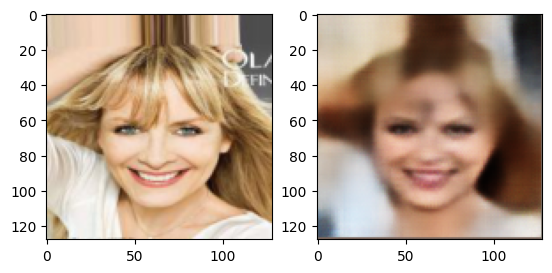

In [70]:
import numpy as np
from PIL import Image


# img = Image.open(r"D:\Imagenet\imagenet-object-localization-challenge\ILSVRC\Data\CLS-LOC\val\val_1\ILSVRC2012_val_00000583.JPEG")
# img = data_transform(img)

test = val_data[np.random.randint(0, 10000)][0]
# test = img

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(test.permute(1, 2, 0))

pred, _ = model(torch.unsqueeze(test, 0).to(device))
ax2.imshow(torch.squeeze(pred.cpu().detach()).permute(1, 2, 0))

In [79]:
import pandas as pd

df = pd.read_csv(r"C:\Visual_Studio\data\celeba\list_attr_celeba.csv")
df.sort_values(by="Smiling", key=lambda x: x != 1)[["img_num", "Smiling"]][0:30]


list_smile = df.sort_values(by="Smiling", key=lambda x: x != 1)[["img_num", "Smiling"]][0:30]['img_num'].values
list_sad = df.sort_values(by="Smiling", key=lambda x: x != 1)[["img_num", "Smiling"]][-31:-1]['img_num'].values

list_smile

array(['000001.jpg', '081904.jpg', '159863.jpg', '081902.jpg',
       '081901.jpg', '081900.jpg', '081899.jpg', '159864.jpg',
       '081897.jpg', '159865.jpg', '081895.jpg', '159866.jpg',
       '159867.jpg', '159868.jpg', '159869.jpg', '081890.jpg',
       '159873.jpg', '081885.jpg', '081884.jpg', '159874.jpg',
       '081882.jpg', '081881.jpg', '159875.jpg', '159876.jpg',
       '081905.jpg', '159877.jpg', '081906.jpg', '159860.jpg',
       '081942.jpg', '081941.jpg'], dtype=object)

In [90]:
smile_vector = torch.zeros([1, 256])

tmp_smile = torch.zeros([1, 256])
model.eval()
for i in range(30):
    img = Image.open(f"C:\\Visual_Studio\\data\\celeba\\img_align_celeba\\{list_smile[i]}")
    img = data_transform(img)

    tmp_smile += model.cpu().encode(torch.unsqueeze(img, 0))

smile_vector / 30


tmp_sad = torch.zeros([1, 256])
for i in range(30):
    img = Image.open(f"C:\\Visual_Studio\\data\\celeba\\img_align_celeba\\{list_sad[i]}")
    img = data_transform(img)

    tmp_sad += model.cpu().encode(torch.unsqueeze(img, 0))

smile_vector = (tmp_smile / 30) - (tmp_sad / 30)

smile_vector

tensor([[ 2.8248e-01, -2.0972e+00, -5.2552e+00,  5.9717e-01, -2.6105e+00,
         -2.2793e+00,  6.5419e-01, -3.8843e-01, -1.9622e+00, -2.6591e+00,
         -3.2485e+00, -3.5879e+00, -3.6577e+00,  3.0400e+00,  3.1256e+00,
         -2.8532e+00, -1.3206e-01,  1.4012e+00,  5.4432e-01, -2.1706e+00,
         -1.3085e+00,  3.9449e+00, -4.9582e+00, -2.2256e+00, -1.9927e+00,
         -4.4741e+00,  1.7180e+00, -7.8703e-01,  1.0321e+00,  1.4380e+00,
         -1.0125e-01,  2.8403e+00, -7.9219e-01,  1.7903e-01, -4.6514e-01,
         -2.8973e+00, -6.6764e-01, -4.8007e+00, -1.0307e+01,  3.8772e+00,
         -2.1424e+00, -9.6219e-01,  3.7090e+00,  1.5034e+00, -1.2727e+00,
         -2.9910e+00,  2.4778e+00, -1.9165e+00, -1.9753e+00,  9.6209e-01,
         -2.3514e+00,  5.2849e+00, -5.1571e-01, -1.6854e+00, -1.6746e+00,
         -3.7703e+00,  2.0485e+00,  1.2763e+00,  5.4281e+00,  5.0511e+00,
          1.2677e+00, -5.4931e-01, -3.5621e+00, -1.1607e+00, -1.6714e-01,
         -5.2112e+00, -9.9451e-01,  4.

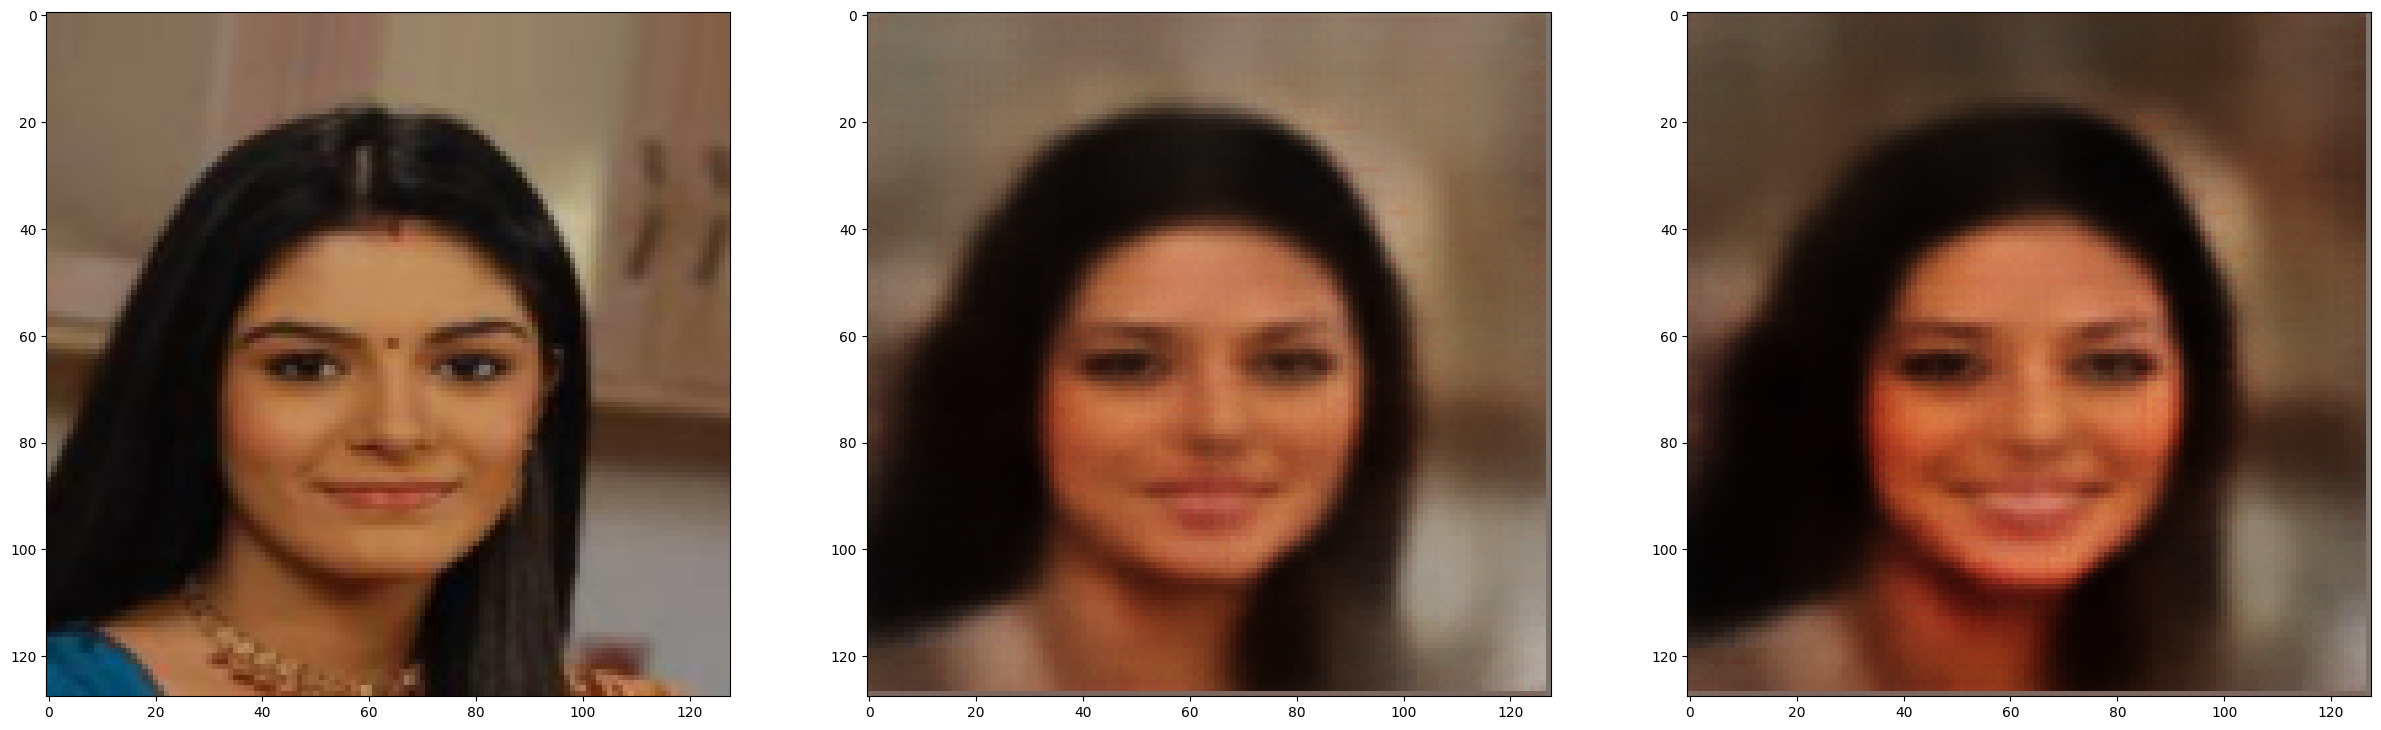

In [144]:
test = val_data[np.random.randint(0, 10000)][0]
# test = img

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(test.permute(1, 2, 0))

_, latent = model(torch.unsqueeze(test, 0))
ax2.imshow(torch.squeeze(_.cpu().detach()).permute(1, 2, 0))

pred = model.decode(latent + smile_vector * 1)
ax3.imshow(torch.squeeze(pred.cpu().detach()).permute(1, 2, 0))